In [1]:
import pandas as pd

# Dataset 1: To Spam or Not to Spam

## SVM

In [2]:
data_file_path = '/Users/parthsandeep/Classifier-Evaluation/spambase/spambase.data'
names_file_path = '/Users/parthsandeep/Classifier-Evaluation/spambase/spambase.names'
columns = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
    "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
    "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
    "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
    "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money",
    "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650",
    "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857",
    "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
    "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
    "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference",
    "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$",
    "char_freq_#", "capital_run_length_average", "capital_run_length_longest",
    "capital_run_length_total", "spam"  
]

In [3]:
spam_df = pd.read_csv(data_file_path, header=None, names=columns)
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [115]:
spam_df['spam'].value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [116]:
print(spam_df.isnull().sum())

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [117]:
X = spam_df.drop(columns=["spam"])
y = spam_df["spam"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (4601, 57)
Target shape: (4601,)


In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
from sklearn.model_selection import train_test_split

splits = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
partitions = []

for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)
    partitions.append((X_train, X_test, y_train, y_test))

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

num_repeats = 3

splits = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
all_results = []

for train_size, test_size in splits:
    print(f"Partition: Train {int(train_size * 100)}%, Test {int(test_size * 100)}%")
    
    partition_data = {"C": [], "Gamma": [], "Train Accuracy": [], "Validation Accuracy": [], "Test Accuracy": []}

    for repeat in range(num_repeats):
        print(f"  Repetition {repeat + 1}")
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=repeat)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        svm_params = {
            'kernel': ['rbf'],
            'C': [0.1, 1, 10],
            'gamma': [0.01, 0.1, 1]
        }

        svm_grid = GridSearchCV(SVC(), param_grid=svm_params, cv=3, scoring='accuracy', return_train_score=True)
        svm_grid.fit(X_train_scaled, y_train)

        print(f"Best Parameters for Partition {train_size*100:.0f}/{test_size*100:.0f}: {svm_grid.best_params_}")


        results = pd.DataFrame(svm_grid.cv_results_)
        for _, row in results.iterrows():
            partition_data["C"].append(row["param_C"])
            partition_data["Gamma"].append(row["param_gamma"])
            partition_data["Train Accuracy"].append(row["mean_train_score"])
            partition_data["Validation Accuracy"].append(row["mean_test_score"])
            best_model = svm_grid.best_estimator_
            test_accuracy = best_model.score(X_test_scaled, y_test)
            partition_data["Test Accuracy"].append(test_accuracy)

    partition_df = pd.DataFrame(partition_data)
    mean_partition_df = partition_df.groupby(["C", "Gamma"]).mean().reset_index()
    mean_partition_df["Partition"] = f"{int(train_size * 100)}/{int(test_size * 100)}"
    all_results.append(mean_partition_df)

final_results_svm_spam = pd.concat(all_results, ignore_index=True)

final_results_svm_spam


Partition: Train 20%, Test 80%
  Repetition 1
Best Parameters for Partition 20/80: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
  Repetition 2
Best Parameters for Partition 20/80: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
  Repetition 3
Best Parameters for Partition 20/80: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Partition: Train 50%, Test 50%
  Repetition 1
Best Parameters for Partition 50/50: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
  Repetition 2
Best Parameters for Partition 50/50: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
  Repetition 3
Best Parameters for Partition 50/50: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Partition: Train 80%, Test 20%
  Repetition 1
Best Parameters for Partition 80/20: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
  Repetition 2
Best Parameters for Partition 80/20: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
  Repetition 3
Best Parameters for Partition 80/20: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


,C,Gamma,Train Accuracy,Validation Accuracy,Test Accuracy,Partition
0,0.1,0.01,0.850180,0.836598,0.911890,20/80
1,0.1,0.10,0.636775,0.631523,0.911890,20/80
2,0.1,1.00,0.624275,0.624275,0.911890,20/80
3,1.0,0.01,0.943479,0.913765,0.911890,20/80
4,1.0,0.10,0.978985,0.856514,0.911890,20/80
5,1.0,1.00,0.995652,0.693127,0.911890,20/80
6,10.0,0.01,0.971376,0.921009,0.911890,20/80
7,10.0,0.10,0.995470,0.854342,0.911890,20/80
8,10.0,1.00,0.998369,0.696389,0.911890,20/80
9,0.1,0.01,0.895726,0.890293,0.929741,50/50


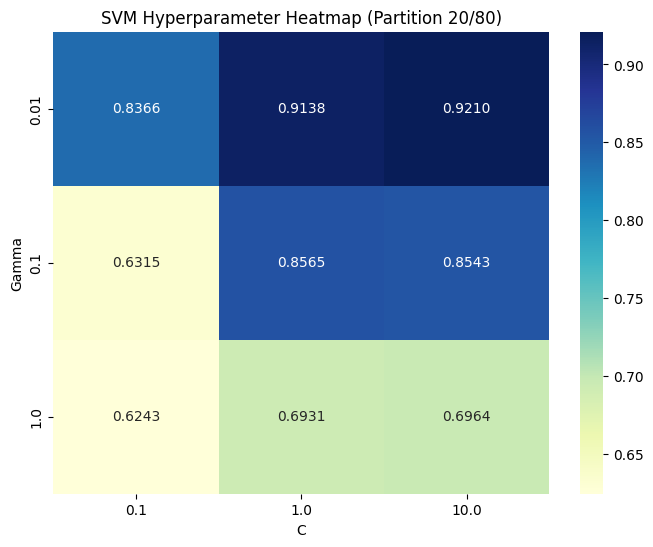

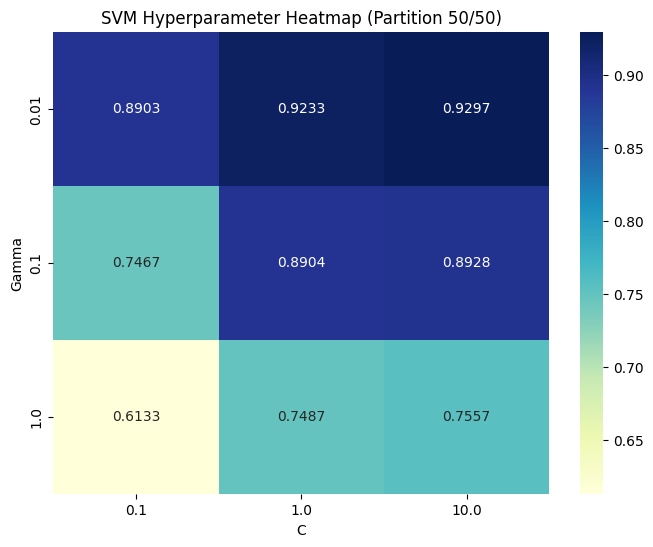

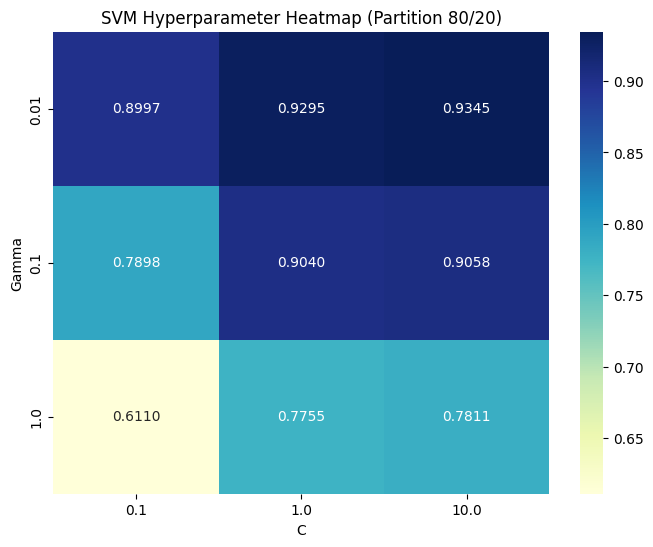

In [121]:
for partition in final_results_svm_spam["Partition"].unique():
    partition_heatmap = final_results_svm_spam[final_results_svm_spam["Partition"] == partition]

    heatmap_pivot = partition_heatmap.pivot(index="Gamma", columns="C", values="Validation Accuracy")

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_pivot, annot=True, fmt=".4f", cmap="YlGnBu")
    plt.title(f"SVM Hyperparameter Heatmap (Partition {partition})")
    plt.xlabel("C")
    plt.ylabel("Gamma")
    plt.show()

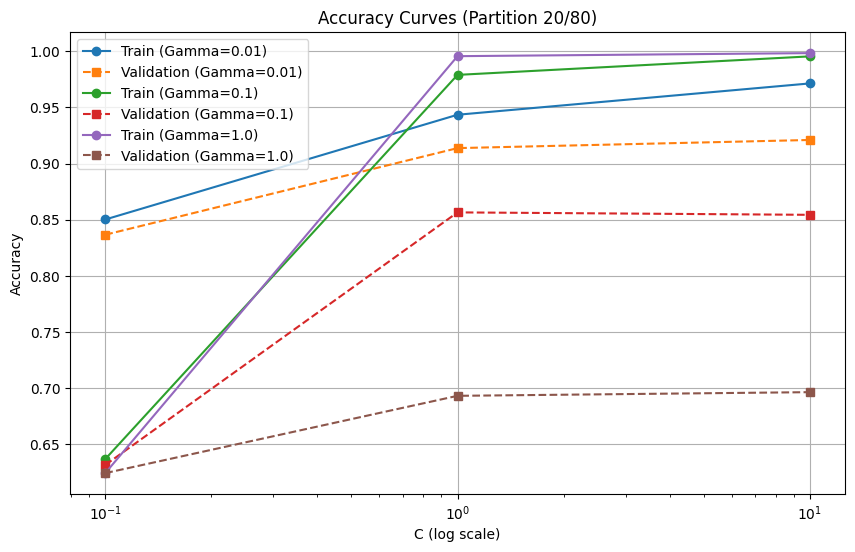

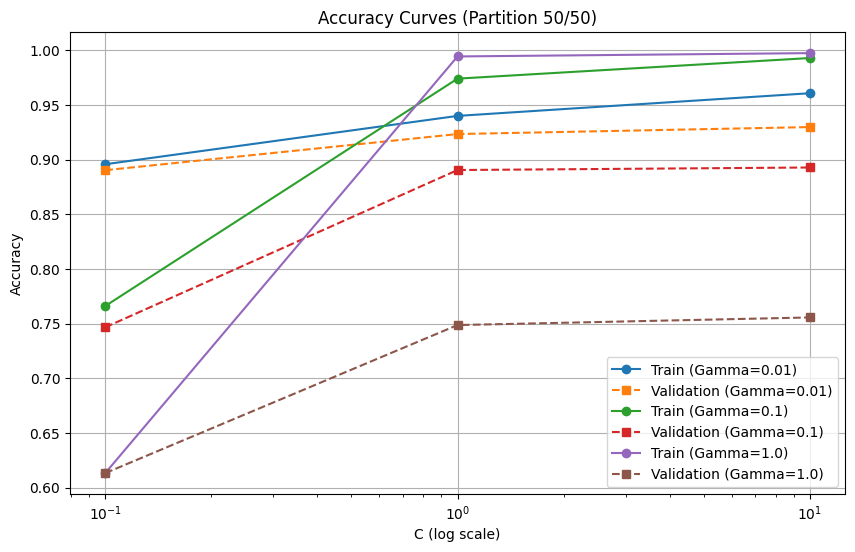

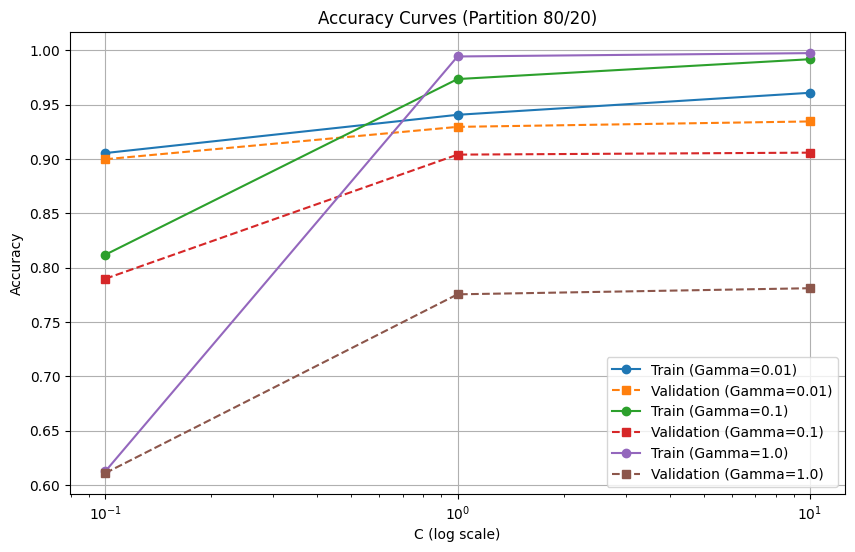

In [122]:
for partition in final_results_svm_spam["Partition"].unique():
    partition_data = final_results_svm_spam[final_results_svm_spam["Partition"] == partition]
    plt.figure(figsize=(10, 6))

    for gamma in partition_data["Gamma"].unique():
        subset = partition_data[partition_data["Gamma"] == gamma]
        plt.plot(subset["C"], subset["Train Accuracy"], marker='o', label=f"Train (Gamma={gamma})")
        plt.plot(subset["C"], subset["Validation Accuracy"], marker='s', linestyle="--", label=f"Validation (Gamma={gamma})")

    plt.xscale("log")
    plt.title(f"Accuracy Curves (Partition {partition})")
    plt.xlabel("C (log scale)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

## Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression

num_repeats = 3

splits = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
all_results_logreg = []

for train_size, test_size in splits:
    print(f"Partition: Train {int(train_size * 100)}%, Test {int(test_size * 100)}%")
    
    partition_data = {"C": [], "Train Accuracy": [], "Validation Accuracy": [], "Test Accuracy": []}

    for repeat in range(num_repeats):
        print(f"  Repetition {repeat + 1}")
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=repeat)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        logreg_params = {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        }

        logreg_grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid=logreg_params, cv=3, scoring='accuracy', return_train_score=True)
        logreg_grid.fit(X_train_scaled, y_train)

        print(f"Best Parameters for Partition {train_size*100:.0f}/{test_size*100:.0f}: {logreg_grid.best_params_}")

        results = pd.DataFrame(logreg_grid.cv_results_)
        for _, row in results.iterrows():
            partition_data["C"].append(row["param_C"])
            partition_data["Train Accuracy"].append(row["mean_train_score"])
            partition_data["Validation Accuracy"].append(row["mean_test_score"])
            best_model = logreg_grid.best_estimator_
            test_accuracy = best_model.score(X_test_scaled, y_test)
            partition_data["Test Accuracy"].append(test_accuracy)

    partition_df = pd.DataFrame(partition_data)
    mean_partition_df = partition_df.groupby(["C"]).mean().reset_index()
    mean_partition_df["Partition"] = f"{int(train_size * 100)}/{int(test_size * 100)}"
    all_results_logreg.append(mean_partition_df)

final_results_logreg_spam = pd.concat(all_results_logreg, ignore_index=True)

final_results_logreg_spam

Partition: Train 20%, Test 80%
  Repetition 1
Best Parameters for Partition 20/80: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 2
Best Parameters for Partition 20/80: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 3
Best Parameters for Partition 20/80: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Partition: Train 50%, Test 50%
  Repetition 1
Best Parameters for Partition 50/50: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 2
Best Parameters for Partition 50/50: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 3
Best Parameters for Partition 50/50: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Partition: Train 80%, Test 20%
  Repetition 1
Best Parameters for Partition 80/20: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 2
Best Parameters for Partition 80/20: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 3
Best Parameters for Partition 80/20: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


,C,Train Accuracy,Validation Accuracy,Test Accuracy,Partition
0,0.01,0.890217,0.877540,0.912343,20/80
1,0.10,0.926089,0.906154,0.912343,20/80
2,1.00,0.944747,0.909776,0.912343,20/80
3,10.00,0.952718,0.910506,0.912343,20/80
4,100.00,0.957609,0.909062,0.912343,20/80
5,0.01,0.903478,0.897251,0.916848,50/50
6,0.10,0.922971,0.914497,0.916848,50/50
7,1.00,0.932899,0.923338,0.916848,50/50
8,10.00,0.935870,0.924063,0.916848,50/50
9,100.00,0.937175,0.923917,0.916848,50/50


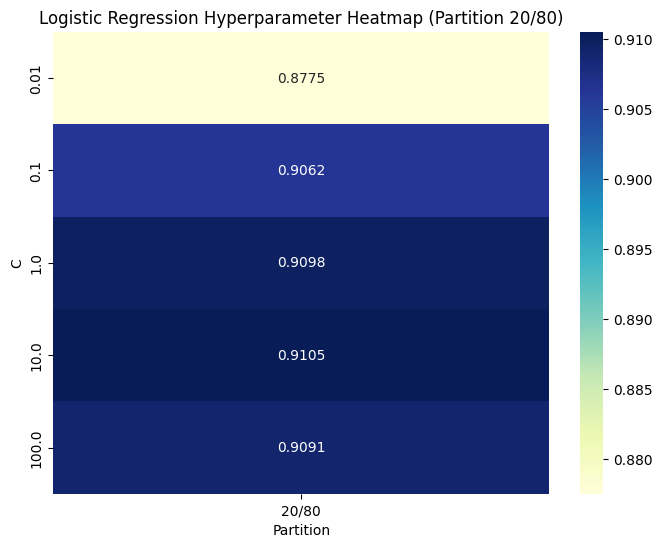

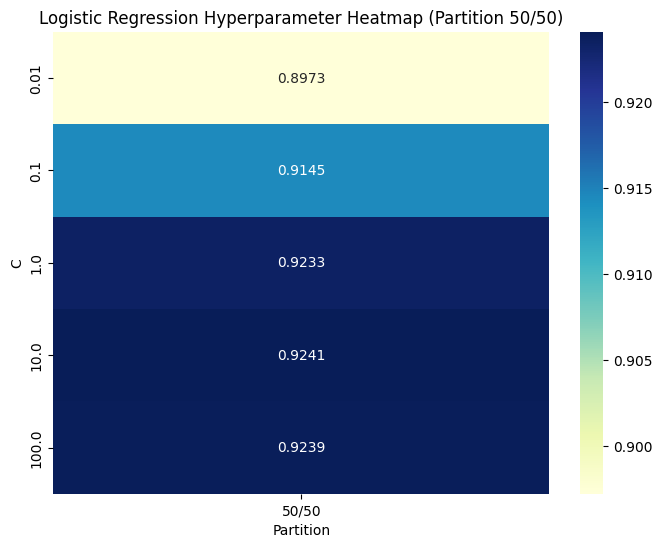

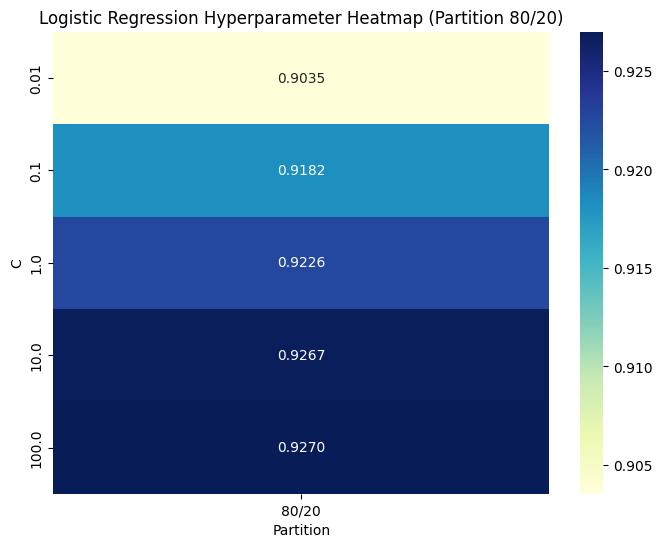

In [124]:
for partition in final_results_logreg_spam["Partition"].unique():
    partition_heatmap = final_results_logreg_spam[final_results_logreg_spam["Partition"] == partition]

    heatmap_pivot = partition_heatmap.pivot(index="C", columns="Partition", values="Validation Accuracy")

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_pivot, annot=True, fmt=".4f", cmap="YlGnBu")
    plt.title(f"Logistic Regression Hyperparameter Heatmap (Partition {partition})")
    plt.xlabel("Partition")
    plt.ylabel("C")
    plt.show()

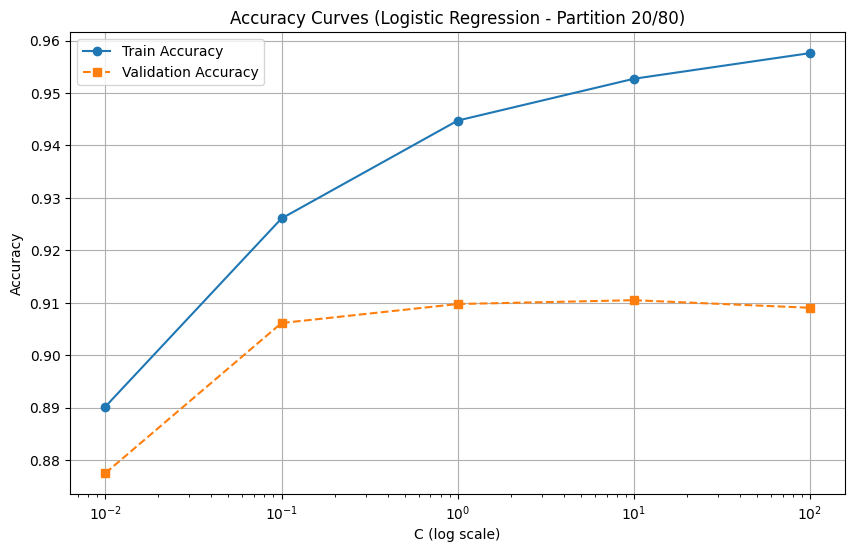

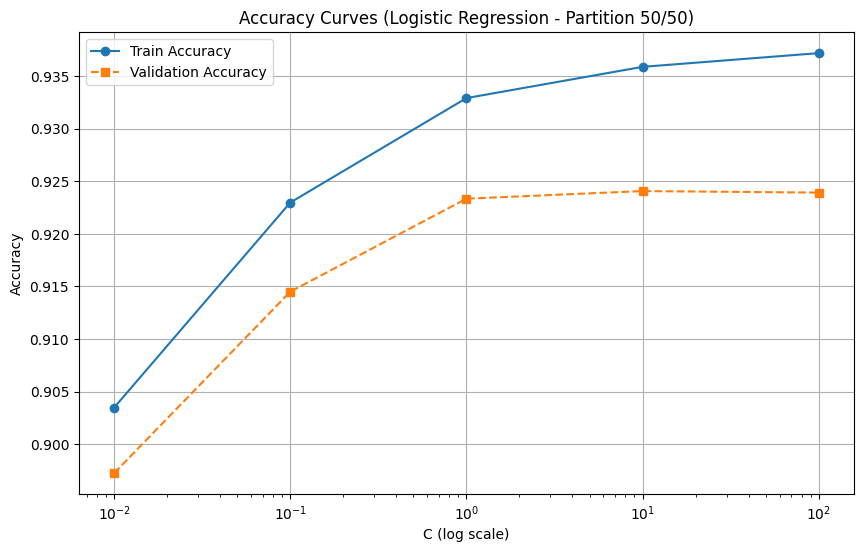

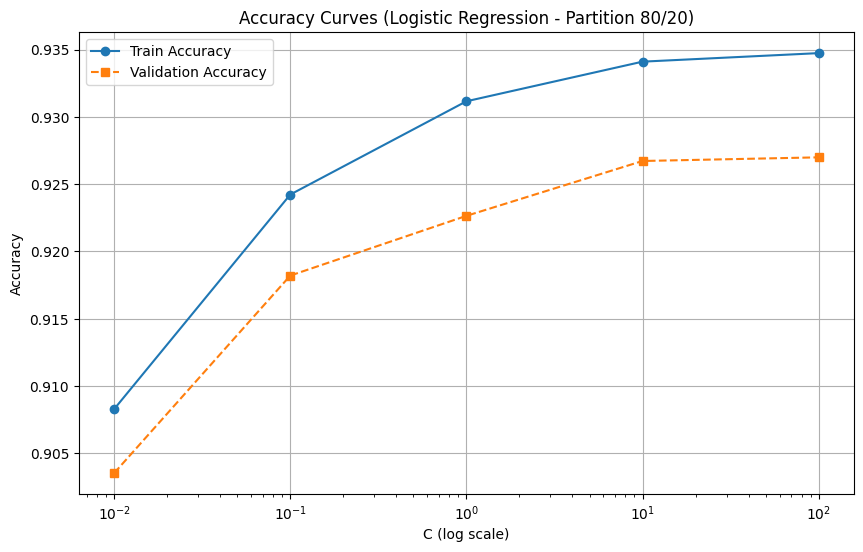

In [125]:
for partition in final_results_logreg_spam["Partition"].unique():
    partition_data = final_results_logreg_spam[final_results_logreg_spam["Partition"] == partition]
    plt.figure(figsize=(10, 6))

    plt.plot(partition_data["C"], partition_data["Train Accuracy"], marker='o', label="Train Accuracy")
    plt.plot(partition_data["C"], partition_data["Validation Accuracy"], marker='s', linestyle="--", label="Validation Accuracy")

    plt.xscale("log")
    plt.title(f"Accuracy Curves (Logistic Regression - Partition {partition})")
    plt.xlabel("C (log scale)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

In [126]:
partition_df = pd.DataFrame(partition_data)

mean_partition_df = partition_df.groupby(["C"]).mean(numeric_only=True).reset_index()
mean_partition_df

,C,Train Accuracy,Validation Accuracy,Test Accuracy
0,0.01,0.908288,0.903535,0.923272
1,0.10,0.924230,0.918209,0.923272
2,1.00,0.931160,0.922648,0.923272
3,10.00,0.934104,0.926724,0.923272
4,100.00,0.934738,0.926995,0.923272


## Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

num_repeats = 3

splits = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
all_results_rf = []

for train_size, test_size in splits:
    print(f"Partition: Train {int(train_size * 100)}%, Test {int(test_size * 100)}%")
    
    partition_data = {"n_estimators": [], "max_features": [], "max_depth": [], 
                      "Train Accuracy": [], "Validation Accuracy": [], "Test Accuracy": []}

    for repeat in range(num_repeats):
        print(f"  Repetition {repeat + 1}")
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=repeat)

        rf_params = {
            'n_estimators': [100, 200, 500],
            'max_features': ['sqrt', 'log2'],
            'max_depth': [None, 10, 20]
        }

        rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=3, scoring='accuracy', return_train_score=True)
        rf_grid.fit(X_train, y_train)

        results = pd.DataFrame(rf_grid.cv_results_)
        for _, row in results.iterrows():
            partition_data["n_estimators"].append(row["param_n_estimators"])
            partition_data["max_features"].append(row["param_max_features"])
            partition_data["max_depth"].append(row["param_max_depth"])
            partition_data["Train Accuracy"].append(row["mean_train_score"])
            partition_data["Validation Accuracy"].append(row["mean_test_score"])
            best_model = rf_grid.best_estimator_
            test_accuracy = best_model.score(X_test, y_test)
            partition_data["Test Accuracy"].append(test_accuracy)

    partition_df = pd.DataFrame(partition_data)
    mean_partition_df = partition_df.groupby(["n_estimators", "max_features", "max_depth"]).mean(numeric_only=True).reset_index()
    mean_partition_df["Partition"] = f"{int(train_size * 100)}/{int(test_size * 100)}"
    all_results_rf.append(mean_partition_df)

final_results_rf_spam = pd.concat(all_results_rf, ignore_index=True)

final_results_rf_spam

Partition: Train 20%, Test 80%
  Repetition 1
  Repetition 2
  Repetition 3
Partition: Train 50%, Test 50%
  Repetition 1
  Repetition 2
  Repetition 3
Partition: Train 80%, Test 20%
  Repetition 1
  Repetition 2
  Repetition 3


,n_estimators,max_features,max_depth,Train Accuracy,Validation Accuracy,Test Accuracy,Partition
0,100,log2,10.0,0.987499,0.928264,0.934710,20/80
1,100,log2,20.0,0.999637,0.934421,0.934710,20/80
2,100,sqrt,10.0,0.990578,0.927901,0.934710,20/80
3,100,sqrt,20.0,0.999819,0.933331,0.934710,20/80
4,200,log2,10.0,0.986593,0.929710,0.934710,20/80
5,200,log2,20.0,0.999637,0.936230,0.934710,20/80
6,200,sqrt,10.0,0.990216,0.931157,0.934710,20/80
7,200,sqrt,20.0,0.999819,0.931887,0.934710,20/80
8,500,log2,10.0,0.987137,0.929348,0.934710,20/80
9,500,log2,20.0,0.999637,0.934055,0.934710,20/80


Creating heatmap for Partition: 20/80


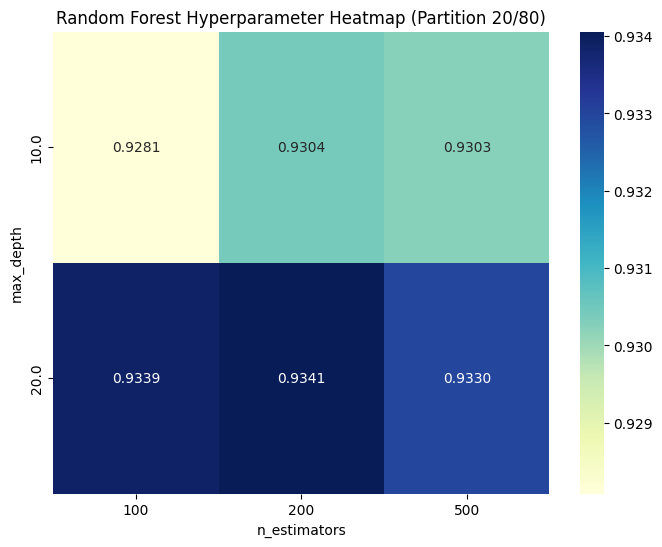

Creating heatmap for Partition: 50/50


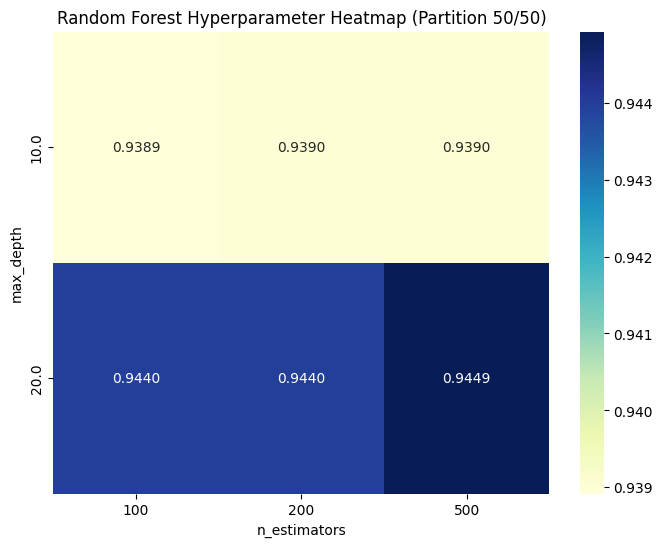

Creating heatmap for Partition: 80/20


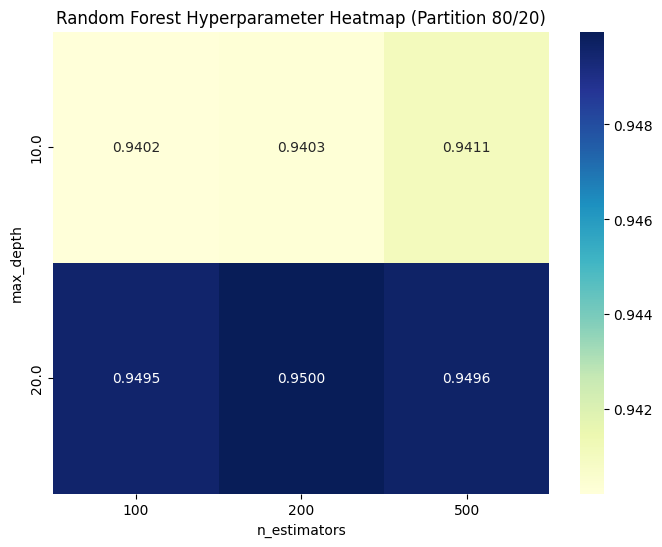

In [128]:
for partition in final_results_rf_spam["Partition"].unique():
    print(f"Creating heatmap for Partition: {partition}")
    
    partition_heatmap = final_results_rf_spam[final_results_rf["Partition"] == partition]

    partition_heatmap = partition_heatmap.groupby(["n_estimators", "max_depth"]).mean(numeric_only=True).reset_index()

    heatmap_pivot = partition_heatmap.pivot(index="max_depth", columns="n_estimators", values="Validation Accuracy")

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_pivot, annot=True, fmt=".4f", cmap="YlGnBu")
    plt.title(f"Random Forest Hyperparameter Heatmap (Partition {partition})")
    plt.xlabel("n_estimators")
    plt.ylabel("max_depth")
    plt.show()

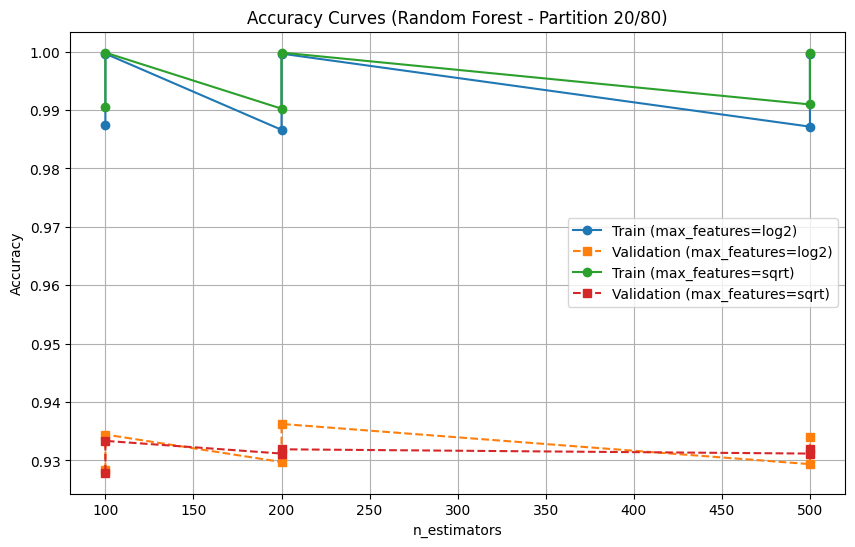

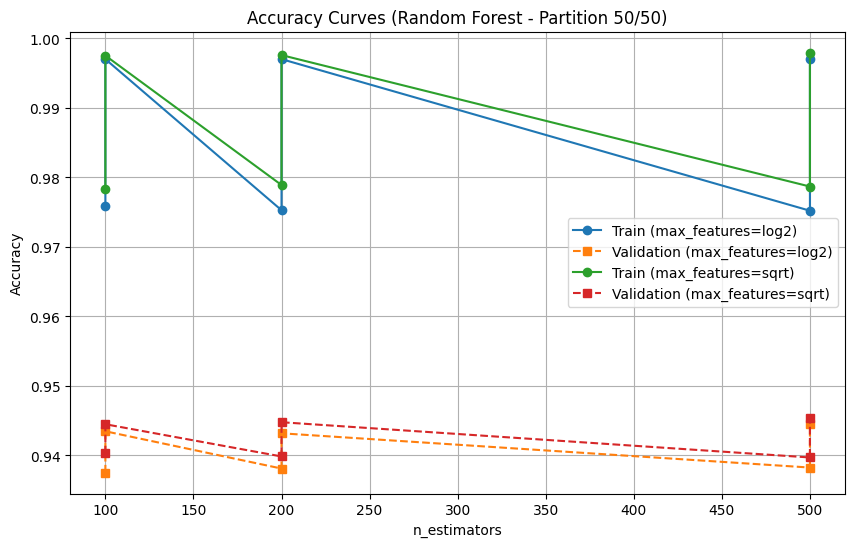

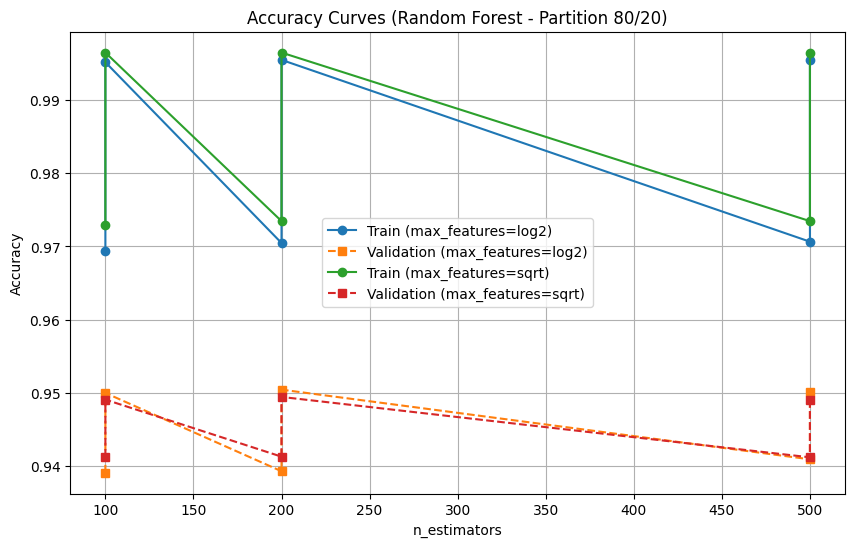

In [129]:
for partition in final_results_rf_spam["Partition"].unique():
    partition_data = final_results_rf_spam[final_results_rf_spam["Partition"] == partition]
    plt.figure(figsize=(10, 6))

    for max_features in partition_data["max_features"].unique():
        subset = partition_data[partition_data["max_features"] == max_features]
        plt.plot(subset["n_estimators"], subset["Train Accuracy"], marker='o', label=f"Train (max_features={max_features})")
        plt.plot(subset["n_estimators"], subset["Validation Accuracy"], marker='s', linestyle="--", label=f"Validation (max_features={max_features})")

    plt.title(f"Accuracy Curves (Random Forest - Partition {partition})")
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

## Classifier Comparison

In [146]:
comparison_data_spam = []

for partition in final_results_svm_spam["Partition"].unique():
    mean_test_accuracy = final_results_svm_spam[final_results_svm_spam["Partition"] == partition]["Test Accuracy"].mean()
    comparison_data_spam.append({"Partition": partition, "Classifier": "SVM", "Test Accuracy": mean_test_accuracy})

for partition in final_results_logreg_spam["Partition"].unique():
    mean_test_accuracy = final_results_logreg_spam[final_results_logreg_spam["Partition"] == partition]["Test Accuracy"].mean()
    comparison_data_spam.append({"Partition": partition, "Classifier": "Logistic Regression", "Test Accuracy": mean_test_accuracy})

for partition in final_results_rf_spam["Partition"].unique():
    mean_test_accuracy = final_results_rf_spam[final_results_rf_spam["Partition"] == partition]["Test Accuracy"].mean()
    comparison_data_spam.append({"Partition": partition, "Classifier": "Random Forest", "Test Accuracy": mean_test_accuracy})

comparison_df_spam = pd.DataFrame(comparison_data_spam)

In [164]:
comparison_df_spam

,Partition,Classifier,Test Accuracy
0,20/80,SVM,0.911890
1,50/50,SVM,0.929741
2,80/20,SVM,0.935939
3,20/80,Logistic Regression,0.912343
4,50/50,Logistic Regression,0.916848
5,80/20,Logistic Regression,0.923272
6,20/80,Random Forest,0.934710
7,50/50,Random Forest,0.949587
8,80/20,Random Forest,0.952226


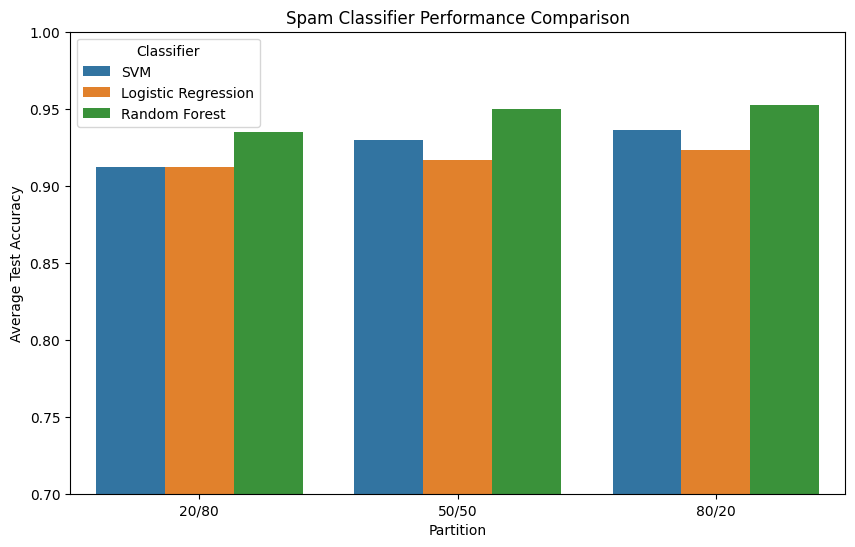

In [161]:
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df_spam, x="Partition", y="Test Accuracy", hue="Classifier")
plt.title("Spam Classifier Performance Comparison")
plt.ylabel("Average Test Accuracy")
plt.xlabel("Partition")
plt.ylim(0.7, 1.0)  # Adjust limits if needed
plt.legend(title="Classifier")
plt.show()

# Dataset 2: I get no Credit - Credit Approvals

## Preprocess

In [4]:
data_path = '/Users/parthsandeep/Classifier-Evaluation/credit+approval/crx.data'
names_path = '/Users/parthsandeep/Classifier-Evaluation/credit+approval/crx.names'

column_names = [
    "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10",
    "A11", "A12", "A13", "A14", "A15", "Class"
]

credit_df = pd.read_csv(data_path, header=None, names=column_names)

credit_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [133]:
credit_df.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [134]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df.replace("?", pd.NA, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

X = df.drop(columns=["Class"])
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features shape:", X_scaled.shape)
print("Target shape:", y.shape)

Features shape: (690, 15)
Target shape: (690,)


## SVM

In [135]:
num_repeats = 3

splits = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
all_results_svm = []

for train_size, test_size in splits:
    print(f"Partition: Train {int(train_size * 100)}%, Test {int(test_size * 100)}%")
    
    partition_data = {"C": [], "Gamma": [], "Train Accuracy": [], "Validation Accuracy": [], "Test Accuracy": []}

    for repeat in range(num_repeats):
        print(f"  Repetition {repeat + 1}")
        
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size, test_size=test_size, random_state=repeat)

        svm_params = {
            'kernel': ['rbf'],
            'C': [0.1, 1, 10],
            'gamma': [0.01, 0.1, 1]
        }

        svm_grid = GridSearchCV(SVC(), param_grid=svm_params, cv=3, scoring='accuracy', return_train_score=True)
        svm_grid.fit(X_train, y_train)

        print(f"    Best Parameters: {svm_grid.best_params_}")

        results = pd.DataFrame(svm_grid.cv_results_)
        for _, row in results.iterrows():
            partition_data["C"].append(row["param_C"])
            partition_data["Gamma"].append(row["param_gamma"])
            partition_data["Train Accuracy"].append(row["mean_train_score"])
            partition_data["Validation Accuracy"].append(row["mean_test_score"])
            best_model = svm_grid.best_estimator_
            test_accuracy = best_model.score(X_test, y_test)
            partition_data["Test Accuracy"].append(test_accuracy)

    partition_df = pd.DataFrame(partition_data)
    mean_partition_df = partition_df.groupby(["C", "Gamma"]).mean(numeric_only=True).reset_index()
    mean_partition_df["Partition"] = f"{int(train_size * 100)}/{int(test_size * 100)}"
    all_results_svm.append(mean_partition_df)

final_results_svm_credit = pd.concat(all_results_svm, ignore_index=True)

final_results_svm_credit

Partition: Train 20%, Test 80%
  Repetition 1
    Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
  Repetition 2
    Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
  Repetition 3
    Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Partition: Train 50%, Test 50%
  Repetition 1
    Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
  Repetition 2
    Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
  Repetition 3
    Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Partition: Train 80%, Test 20%
  Repetition 1
    Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
  Repetition 2
    Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
  Repetition 3
    Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


,C,Gamma,Train Accuracy,Validation Accuracy,Test Accuracy,Partition
0,0.1,0.01,0.550725,0.550725,0.858696,20/80
1,0.1,0.10,0.561594,0.555556,0.858696,20/80
2,0.1,1.00,0.550725,0.550725,0.858696,20/80
3,1.0,0.01,0.884058,0.847826,0.858696,20/80
4,1.0,0.10,0.946860,0.835749,0.858696,20/80
5,1.0,1.00,0.998792,0.579710,0.858696,20/80
6,10.0,0.01,0.903382,0.847826,0.858696,20/80
7,10.0,0.10,0.995169,0.772947,0.858696,20/80
8,10.0,1.00,1.000000,0.589372,0.858696,20/80
9,0.1,0.01,0.688406,0.678261,0.875362,50/50


Creating heatmap for Partition: 20/80


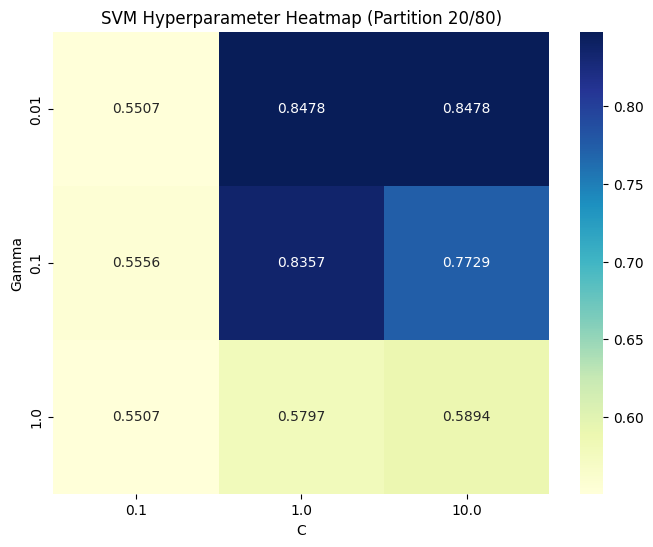

Creating heatmap for Partition: 50/50


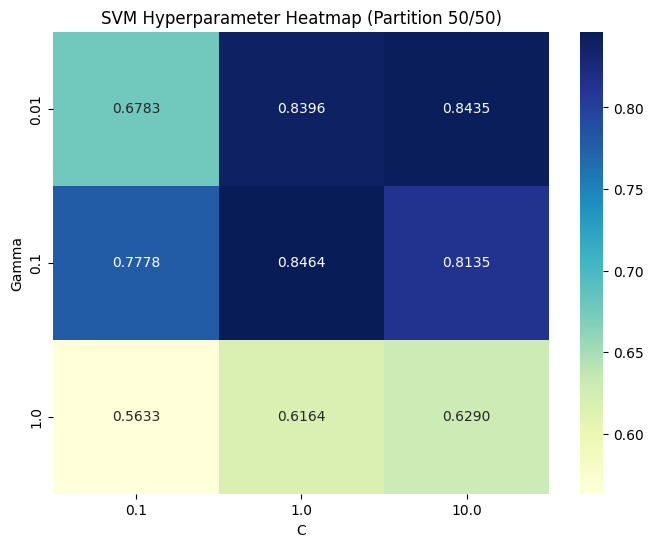

Creating heatmap for Partition: 80/20


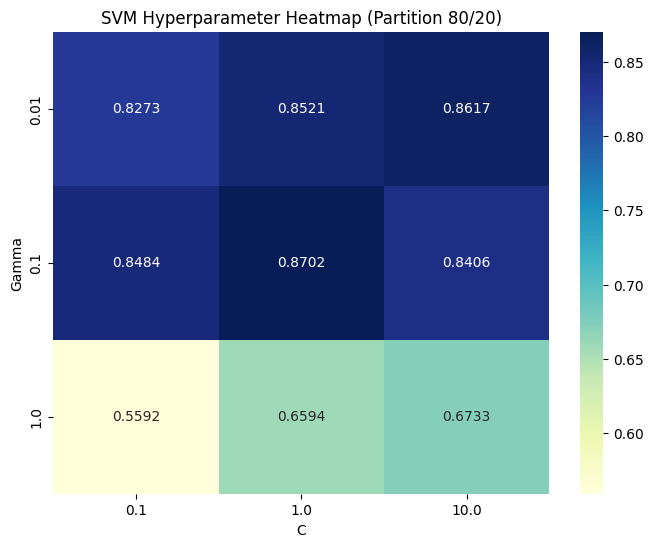

In [136]:
for partition in final_results_svm_credit["Partition"].unique():
    print(f"Creating heatmap for Partition: {partition}")
    
    partition_heatmap = final_results_svm[final_results_svm["Partition"] == partition]

    heatmap_pivot = partition_heatmap.pivot(index="Gamma", columns="C", values="Validation Accuracy")

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_pivot, annot=True, fmt=".4f", cmap="YlGnBu")
    plt.title(f"SVM Hyperparameter Heatmap (Partition {partition})")
    plt.xlabel("C")
    plt.ylabel("Gamma")
    plt.show()


Creating accuracy curves for Partition: 20/80


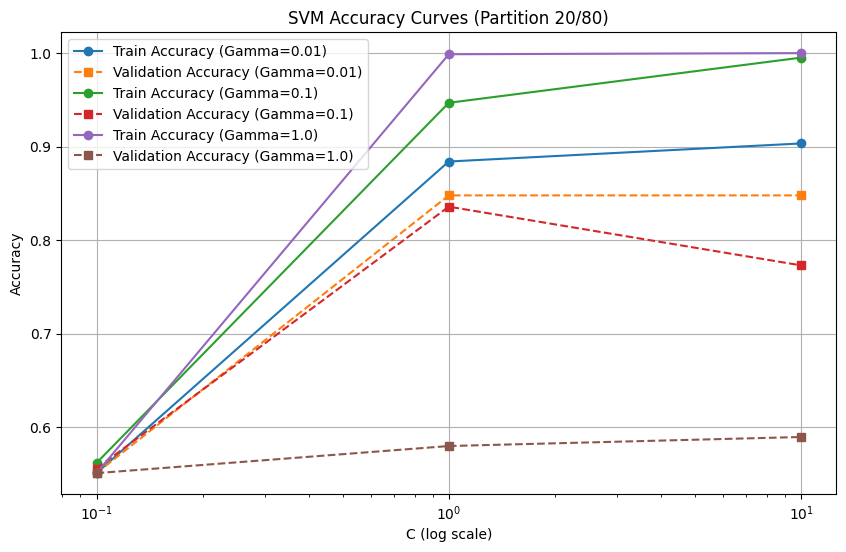

Creating accuracy curves for Partition: 50/50


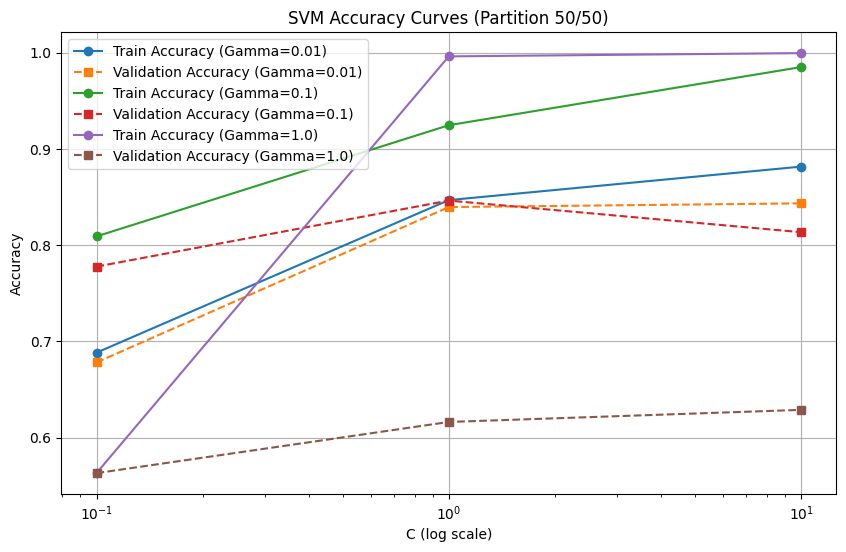

Creating accuracy curves for Partition: 80/20


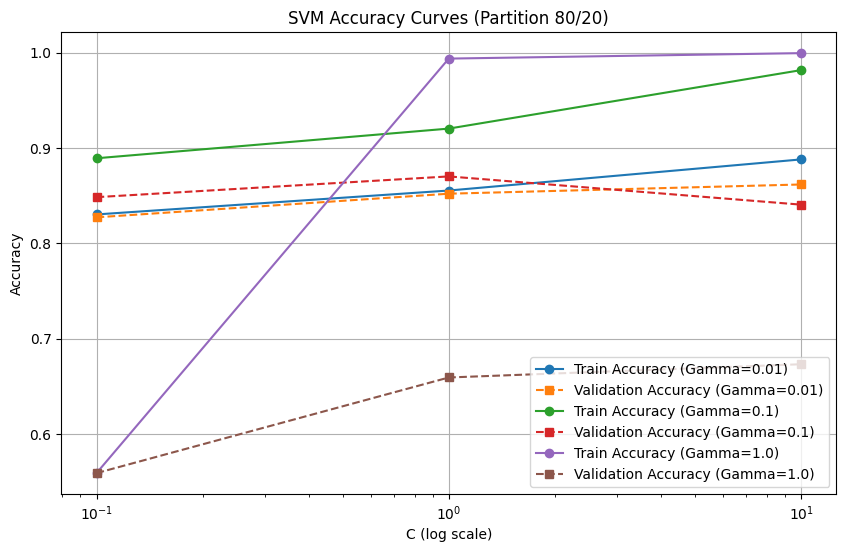

In [137]:
for partition in final_results_svm_credit["Partition"].unique():
    print(f"Creating accuracy curves for Partition: {partition}")

    partition_data = final_results_svm_credit[final_results_svm_credit["Partition"] == partition]

    plt.figure(figsize=(10, 6))
    for gamma in partition_data["Gamma"].unique():
        subset = partition_data[partition_data["Gamma"] == gamma]
        plt.plot(
            subset["C"],
            subset["Train Accuracy"],
            marker='o',
            label=f"Train Accuracy (Gamma={gamma})"
        )
        plt.plot(
            subset["C"],
            subset["Validation Accuracy"],
            marker='s',
            linestyle="--",
            label=f"Validation Accuracy (Gamma={gamma})"
        )

    plt.xscale("log")
    plt.title(f"SVM Accuracy Curves (Partition {partition})")
    plt.xlabel("C (log scale)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

## Logisitic Regression

In [138]:
num_repeats = 3

splits = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
all_results_logreg = []

for train_size, test_size in splits:
    print(f"Partition: Train {int(train_size * 100)}%, Test {int(test_size * 100)}%")
    
    partition_data = {"C": [], "Train Accuracy": [], "Validation Accuracy": [], "Test Accuracy": []}

    for repeat in range(num_repeats):
        print(f"  Repetition {repeat + 1}")
        
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size, test_size=test_size, random_state=repeat)

        logreg_params = {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        }

        logreg_grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid=logreg_params, cv=3, scoring='accuracy', return_train_score=True)
        logreg_grid.fit(X_train, y_train)

        print(f"    Best Parameters: {logreg_grid.best_params_}")

        results = pd.DataFrame(logreg_grid.cv_results_)
        for _, row in results.iterrows():
            partition_data["C"].append(row["param_C"])
            partition_data["Train Accuracy"].append(row["mean_train_score"])
            partition_data["Validation Accuracy"].append(row["mean_test_score"])
            best_model = logreg_grid.best_estimator_
            test_accuracy = best_model.score(X_test, y_test)
            partition_data["Test Accuracy"].append(test_accuracy)

    partition_df = pd.DataFrame(partition_data)
    mean_partition_df = partition_df.groupby(["C"]).mean(numeric_only=True).reset_index()
    mean_partition_df["Partition"] = f"{int(train_size * 100)}/{int(test_size * 100)}"
    all_results_logreg.append(mean_partition_df)

final_results_logreg_credit = pd.concat(all_results_logreg, ignore_index=True)

final_results_logreg_credit

Partition: Train 20%, Test 80%
  Repetition 1
    Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 2
    Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 3
    Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Partition: Train 50%, Test 50%
  Repetition 1
    Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 2
    Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 3
    Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Partition: Train 80%, Test 20%
  Repetition 1
    Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 2
    Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 3
    Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


,C,Train Accuracy,Validation Accuracy,Test Accuracy,Partition
0,0.01,0.836957,0.806763,0.849034,20/80
1,0.10,0.882850,0.842995,0.849034,20/80
2,1.00,0.892512,0.821256,0.849034,20/80
3,10.00,0.897343,0.821256,0.849034,20/80
4,100.00,0.902174,0.816425,0.849034,20/80
5,0.01,0.847343,0.834783,0.881159,50/50
6,0.10,0.864734,0.854106,0.881159,50/50
7,1.00,0.871981,0.860870,0.881159,50/50
8,10.00,0.873913,0.857971,0.881159,50/50
9,100.00,0.872464,0.855072,0.881159,50/50


Creating heatmap for Partition: 20/80


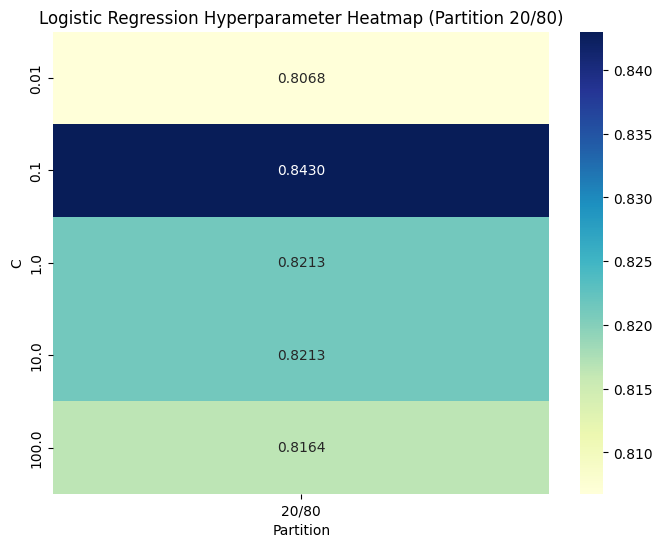

Creating heatmap for Partition: 50/50


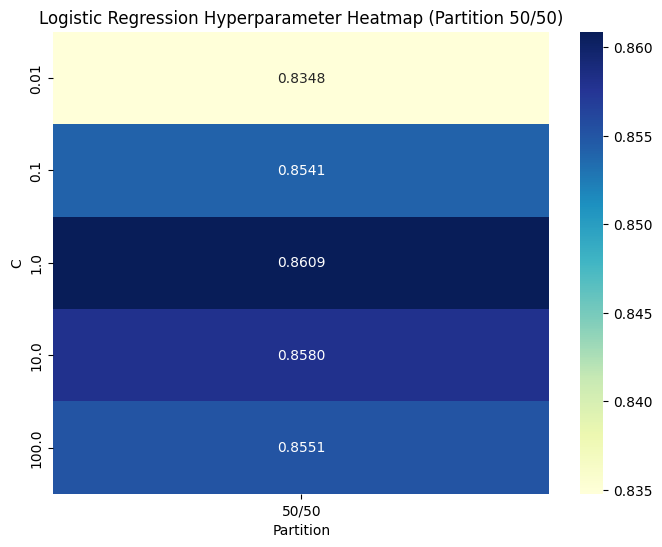

Creating heatmap for Partition: 80/20


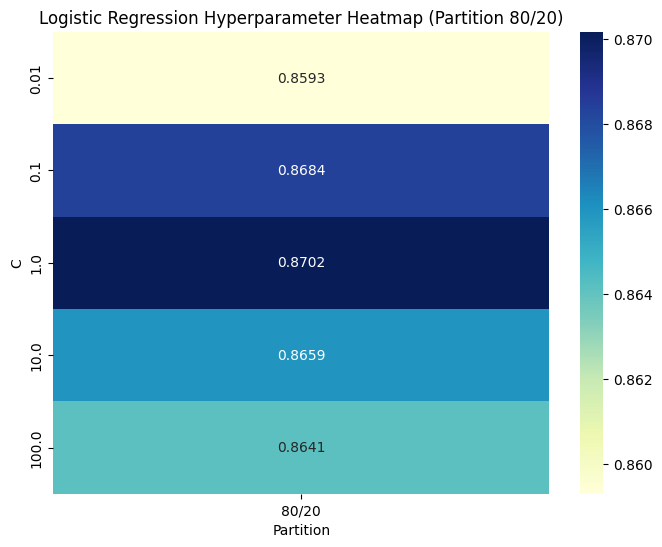

In [139]:
for partition in final_results_logreg_credit["Partition"].unique():
    print(f"Creating heatmap for Partition: {partition}")
    
    partition_heatmap = final_results_logreg_credit[final_results_logreg_credit["Partition"] == partition]

    heatmap_pivot = partition_heatmap.pivot(index="C", columns="Partition", values="Validation Accuracy")

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_pivot, annot=True, fmt=".4f", cmap="YlGnBu")
    plt.title(f"Logistic Regression Hyperparameter Heatmap (Partition {partition})")
    plt.xlabel("Partition")
    plt.ylabel("C")
    plt.show()

Creating accuracy curves for Partition: 20/80


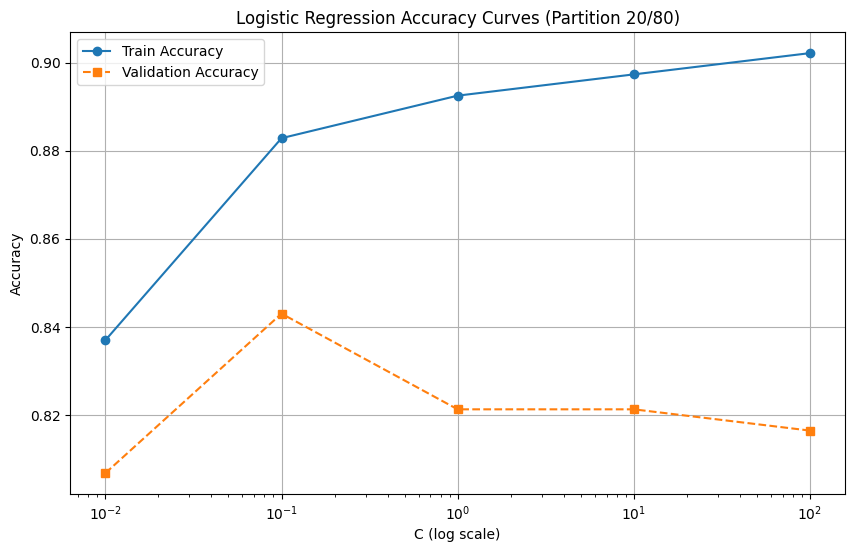

Creating accuracy curves for Partition: 50/50


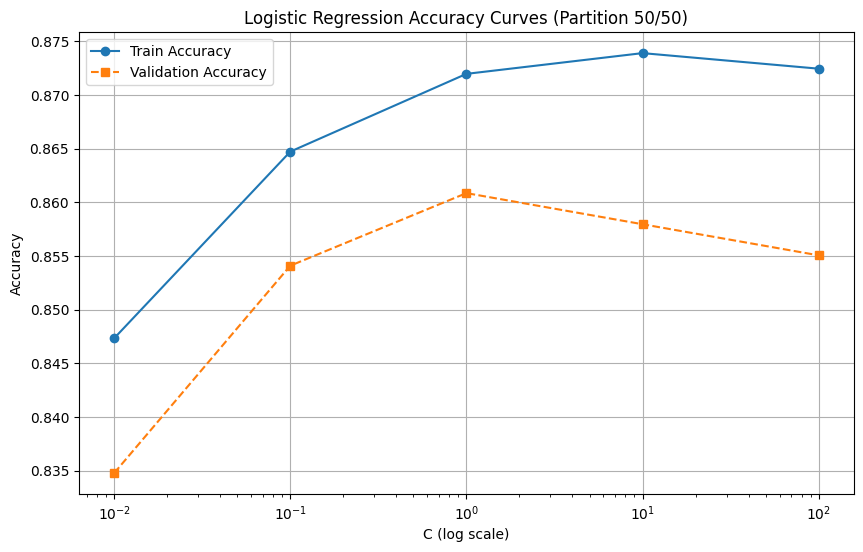

Creating accuracy curves for Partition: 80/20


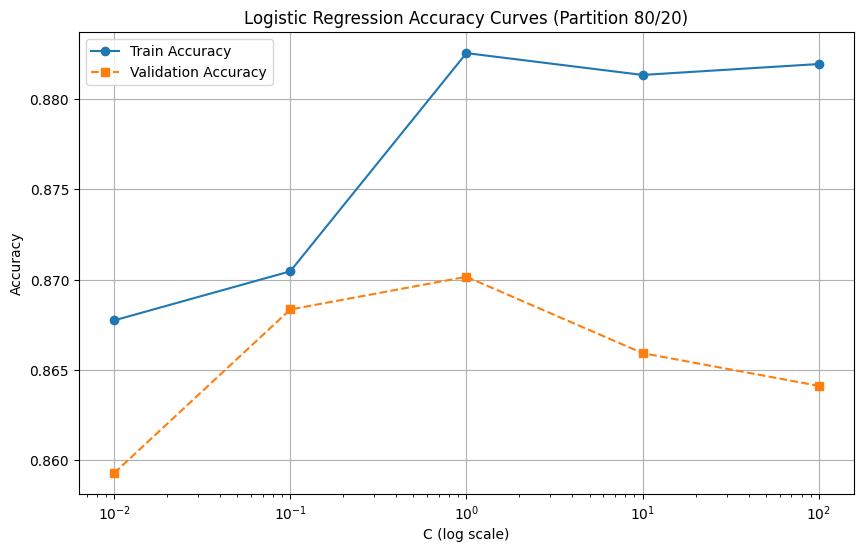

In [140]:
for partition in final_results_logreg_credit["Partition"].unique():
    print(f"Creating accuracy curves for Partition: {partition}")

    partition_data = final_results_logreg_credit[final_results_logreg_credit["Partition"] == partition]

    plt.figure(figsize=(10, 6))
    plt.plot(
        partition_data["C"],
        partition_data["Train Accuracy"],
        marker='o',
        label="Train Accuracy"
    )
    plt.plot(
        partition_data["C"],
        partition_data["Validation Accuracy"],
        marker='s',
        linestyle="--",
        label="Validation Accuracy"
    )

    plt.xscale("log")
    plt.title(f"Logistic Regression Accuracy Curves (Partition {partition})")
    plt.xlabel("C (log scale)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()


## Random Forest

In [141]:
num_repeats = 3

splits = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
all_results_rf = []

for train_size, test_size in splits:
    print(f"Partition: Train {int(train_size * 100)}%, Test {int(test_size * 100)}%")
    
    partition_data = {"n_estimators": [], "max_features": [], "max_depth": [], 
                      "Train Accuracy": [], "Validation Accuracy": [], "Test Accuracy": []}

    for repeat in range(num_repeats):
        print(f"  Repetition {repeat + 1}")
        
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size, test_size=test_size, random_state=repeat)

        rf_params = {
            'n_estimators': [100, 200, 500],
            'max_features': ['sqrt', 'log2'],
            'max_depth': [None, 10, 20]
        }

        rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=3, scoring='accuracy', return_train_score=True)
        rf_grid.fit(X_train, y_train)

        print(f"    Best Parameters: {rf_grid.best_params_}")

        results = pd.DataFrame(rf_grid.cv_results_)
        for _, row in results.iterrows():
            partition_data["n_estimators"].append(row["param_n_estimators"])
            partition_data["max_features"].append(row["param_max_features"])
            partition_data["max_depth"].append(row["param_max_depth"])
            partition_data["Train Accuracy"].append(row["mean_train_score"])
            partition_data["Validation Accuracy"].append(row["mean_test_score"])
            best_model = rf_grid.best_estimator_
            test_accuracy = best_model.score(X_test, y_test)
            partition_data["Test Accuracy"].append(test_accuracy)

    partition_df = pd.DataFrame(partition_data)
    mean_partition_df = partition_df.groupby(["n_estimators", "max_features", "max_depth"]).mean(numeric_only=True).reset_index()
    mean_partition_df["Partition"] = f"{int(train_size * 100)}/{int(test_size * 100)}"
    all_results_rf.append(mean_partition_df)

final_results_rf_credit = pd.concat(all_results_rf, ignore_index=True)

final_results_rf_credit

Partition: Train 20%, Test 80%
  Repetition 1
    Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
  Repetition 2
    Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
  Repetition 3
    Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Partition: Train 50%, Test 50%
  Repetition 1
    Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
  Repetition 2
    Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}
  Repetition 3
    Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}
Partition: Train 80%, Test 20%
  Repetition 1
    Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
  Repetition 2
    Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
  Repetition 3
    Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


,n_estimators,max_features,max_depth,Train Accuracy,Validation Accuracy,Test Accuracy,Partition
0,100,log2,10.0,1.000000,0.862319,0.858696,20/80
1,100,log2,20.0,1.000000,0.862319,0.858696,20/80
2,100,sqrt,10.0,1.000000,0.862319,0.858696,20/80
3,100,sqrt,20.0,1.000000,0.862319,0.858696,20/80
4,200,log2,10.0,1.000000,0.864734,0.858696,20/80
5,200,log2,20.0,1.000000,0.867150,0.858696,20/80
6,200,sqrt,10.0,1.000000,0.864734,0.858696,20/80
7,200,sqrt,20.0,1.000000,0.867150,0.858696,20/80
8,500,log2,10.0,1.000000,0.862319,0.858696,20/80
9,500,log2,20.0,1.000000,0.864734,0.858696,20/80


Creating heatmap for Partition: 20/80


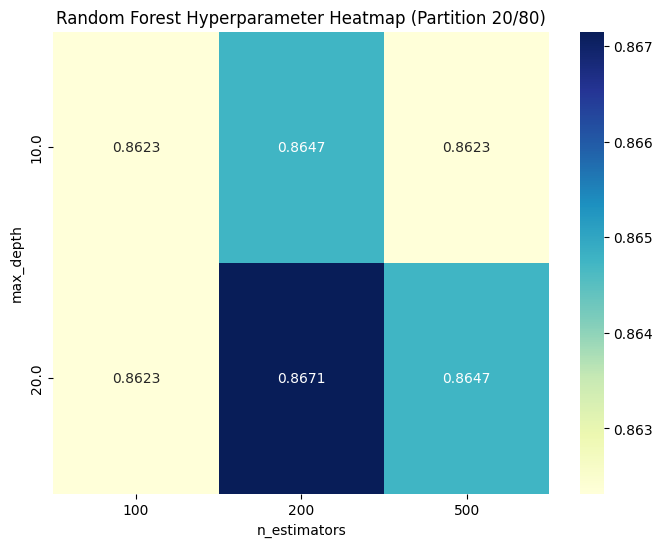

Creating heatmap for Partition: 50/50


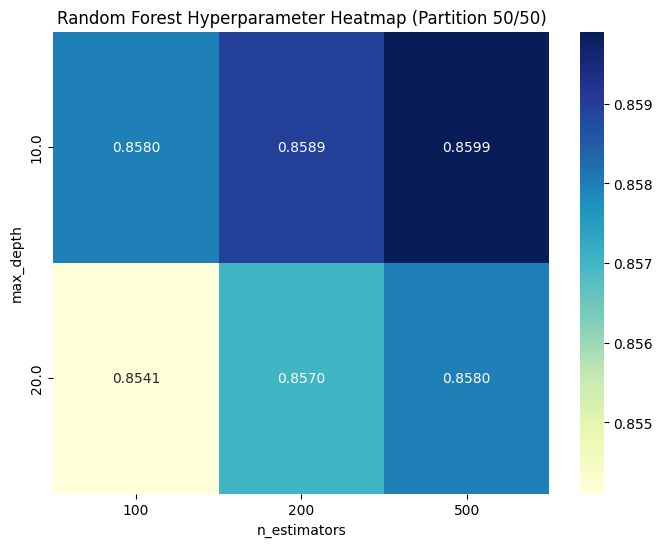

Creating heatmap for Partition: 80/20


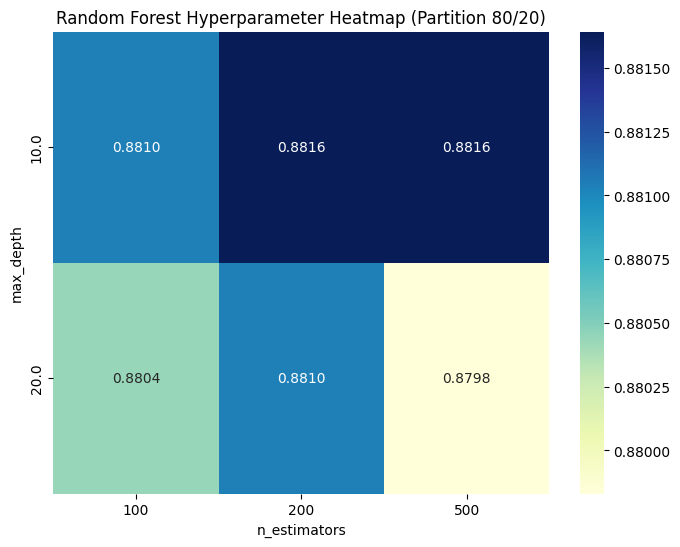

In [142]:
for partition in final_results_rf_credit["Partition"].unique():
    print(f"Creating heatmap for Partition: {partition}")
    
    partition_heatmap = final_results_rf_credit[final_results_rf_credit["Partition"] == partition]

    partition_heatmap = partition_heatmap.groupby(["n_estimators", "max_depth"]).mean(numeric_only=True).reset_index()

    heatmap_pivot = partition_heatmap.pivot(index="max_depth", columns="n_estimators", values="Validation Accuracy")

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_pivot, annot=True, fmt=".4f", cmap="YlGnBu")
    plt.title(f"Random Forest Hyperparameter Heatmap (Partition {partition})")
    plt.xlabel("n_estimators")
    plt.ylabel("max_depth")
    plt.show()

Creating accuracy curves for Partition: 20/80


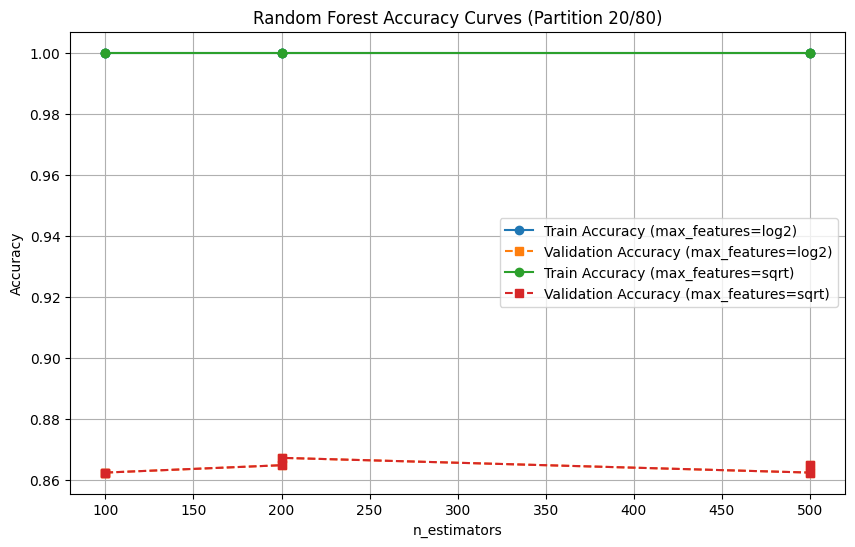

Creating accuracy curves for Partition: 50/50


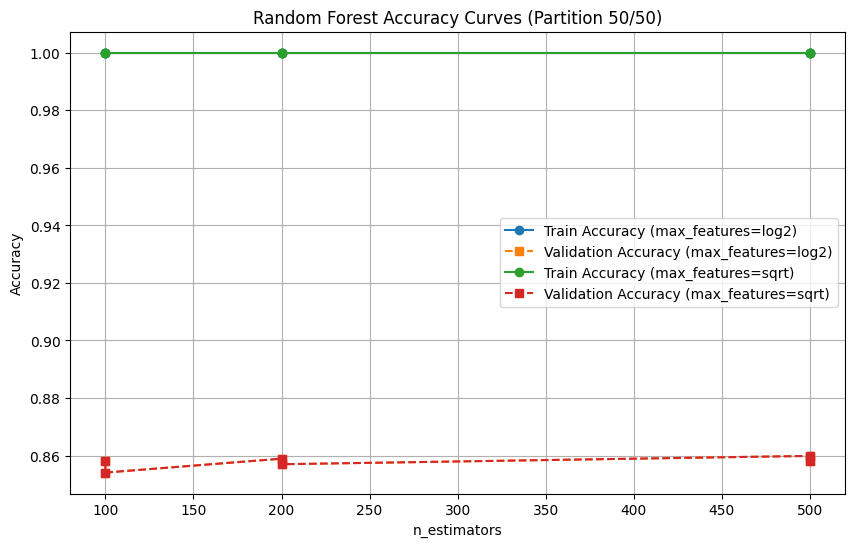

Creating accuracy curves for Partition: 80/20


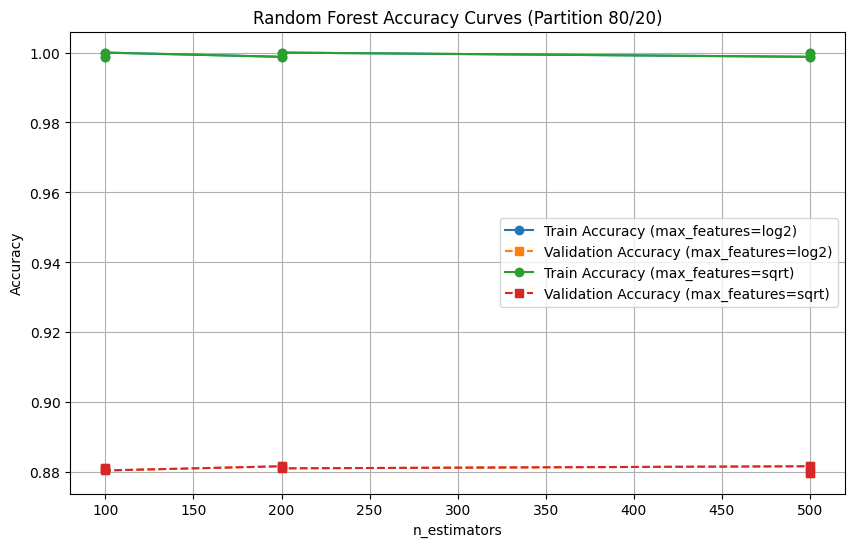

In [143]:
for partition in final_results_rf_credit["Partition"].unique():
    print(f"Creating accuracy curves for Partition: {partition}")

    partition_data = final_results_rf_credit[final_results_rf_credit["Partition"] == partition]
    plt.figure(figsize=(10, 6))

    for max_features in partition_data["max_features"].unique():
        subset = partition_data[partition_data["max_features"] == max_features]
        plt.plot(
            subset["n_estimators"],
            subset["Train Accuracy"],
            marker='o',
            label=f"Train Accuracy (max_features={max_features})"
        )
        plt.plot(
            subset["n_estimators"],
            subset["Validation Accuracy"],
            marker='s',
            linestyle="--",
            label=f"Validation Accuracy (max_features={max_features})"
        )

    plt.title(f"Random Forest Accuracy Curves (Partition {partition})")
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

In [144]:
comparison_data_credit = []

for partition in final_results_svm_credit["Partition"].unique():
    mean_test_accuracy = final_results_svm_credit[final_results_svm_credit["Partition"] == partition]["Test Accuracy"].mean()
    comparison_data_credit.append({"Partition": partition, "Classifier": "SVM", "Test Accuracy": mean_test_accuracy})

for partition in final_results_logreg_credit["Partition"].unique():
    mean_test_accuracy = final_results_logreg_credit[final_results_logreg_credit["Partition"] == partition]["Test Accuracy"].mean()
    comparison_data_credit.append({"Partition": partition, "Classifier": "Logistic Regression", "Test Accuracy": mean_test_accuracy})

for partition in final_results_rf_credit["Partition"].unique():
    mean_test_accuracy = final_results_rf_credit[final_results_rf_credit["Partition"] == partition]["Test Accuracy"].mean()
    comparison_data_credit.append({"Partition": partition, "Classifier": "Random Forest", "Test Accuracy": mean_test_accuracy})

comparison_df_credit = pd.DataFrame(comparison_data_credit)

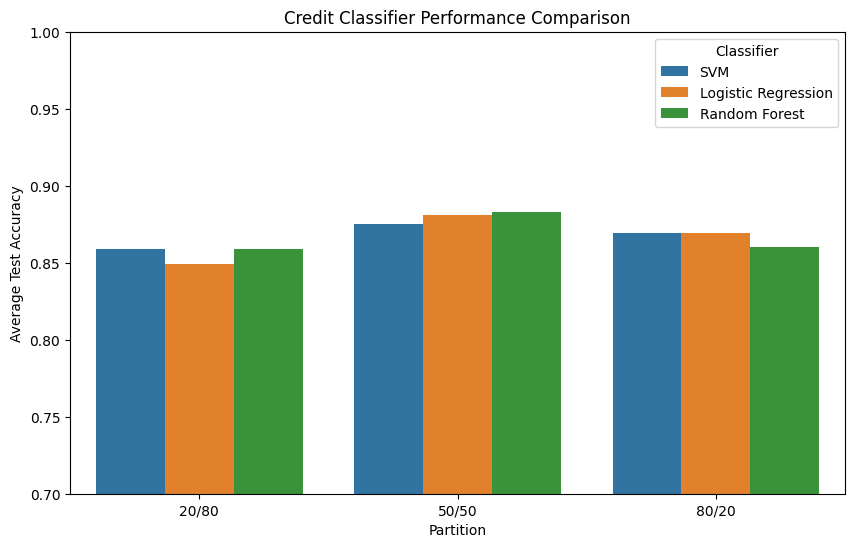

In [162]:
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df_credit, x="Partition", y="Test Accuracy", hue="Classifier")
plt.title("Credit Classifier Performance Comparison")
plt.ylabel("Average Test Accuracy")
plt.xlabel("Partition")
plt.ylim(0.7, 1.0)  # Adjust limits if needed
plt.legend(title="Classifier")
plt.show()

# Dataset 3: Gimme an X, Gimme an O

## SVM

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data_path = '/Users/parthsandeep/Classifier-Evaluation/tic+tac+toe+endgame/tic-tac-toe.data'
column_names = [
    "top-left-square", "top-middle-square", "top-right-square",
    "middle-left-square", "middle-middle-square", "middle-right-square",
    "bottom-left-square", "bottom-middle-square", "bottom-right-square",
    "Class"
]
tic_df = pd.read_csv(data_path, header=None, names=column_names)
tic_df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [93]:
feature_map = {'x': 1, 'o': 0, 'b': -1}
for col in tic_df.columns[:-1]:  
    tic_df[col] = tic_df[col].map(feature_map)

In [95]:
target_map = {'positive': 1, 'negative': 0}
tic_df["Class"] = tic_df["Class"].map(target_map)

In [96]:
tic_df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,1,1,1,1,0,0,1,0,0,1
1,1,1,1,1,0,0,0,1,0,1
2,1,1,1,1,0,0,0,0,1,1
3,1,1,1,1,0,0,0,-1,-1,1
4,1,1,1,1,0,0,-1,0,-1,1
...,...,...,...,...,...,...,...,...,...,...
953,0,1,1,1,0,0,0,1,1,0
954,0,1,0,1,1,0,1,0,1,0
955,0,1,0,1,0,1,1,0,1,0
956,0,1,0,0,1,1,1,0,1,0


In [97]:
X = df.drop(columns=["Class"])
y = df["Class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features shape:", X_scaled.shape)
print("Target shape:", y.shape)
print("Class distribution:\n", pd.Series(y).value_counts())

Features shape: (690, 15)
Target shape: (690,)
Class distribution:
 Class
1    383
0    307
Name: count, dtype: int64


In [149]:
num_repeats = 3

splits = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
all_results_svm = []

for train_size, test_size in splits:
    print(f"Partition: Train {int(train_size * 100)}%, Test {int(test_size * 100)}%")
    
    partition_data = {"C": [], "Gamma": [], "Train Accuracy": [], "Validation Accuracy": [], "Test Accuracy": []}

    for repeat in range(num_repeats):
        print(f"  Repetition {repeat + 1}")
        
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size, test_size=test_size, random_state=repeat)

        svm_params = {
            'kernel': ['rbf'],
            'C': [0.1, 1, 10],
            'gamma': [0.01, 0.1, 1]
        }

        svm_grid = GridSearchCV(SVC(), param_grid=svm_params, cv=3, scoring='accuracy', return_train_score=True)
        svm_grid.fit(X_train, y_train)

        print(f"    Best Parameters: {svm_grid.best_params_}")

        results = pd.DataFrame(svm_grid.cv_results_)
        for _, row in results.iterrows():
            partition_data["C"].append(row["param_C"])
            partition_data["Gamma"].append(row["param_gamma"])
            partition_data["Train Accuracy"].append(row["mean_train_score"])
            partition_data["Validation Accuracy"].append(row["mean_test_score"])
            best_model = svm_grid.best_estimator_
            test_accuracy = best_model.score(X_test, y_test)
            partition_data["Test Accuracy"].append(test_accuracy)

    partition_df = pd.DataFrame(partition_data)
    mean_partition_df = partition_df.groupby(["C", "Gamma"]).mean(numeric_only=True).reset_index()
    mean_partition_df["Partition"] = f"{int(train_size * 100)}/{int(test_size * 100)}"
    all_results_svm.append(mean_partition_df)

final_results_svm_tic = pd.concat(all_results_svm, ignore_index=True)

final_results_svm_tic


Partition: Train 20%, Test 80%
  Repetition 1
    Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
  Repetition 2
    Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
  Repetition 3
    Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Partition: Train 50%, Test 50%
  Repetition 1
    Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
  Repetition 2
    Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
  Repetition 3
    Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Partition: Train 80%, Test 20%
  Repetition 1
    Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
  Repetition 2
    Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
  Repetition 3
    Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


,C,Gamma,Train Accuracy,Validation Accuracy,Test Accuracy,Partition
0,0.1,0.01,0.550725,0.550725,0.858696,20/80
1,0.1,0.10,0.561594,0.555556,0.858696,20/80
2,0.1,1.00,0.550725,0.550725,0.858696,20/80
3,1.0,0.01,0.884058,0.847826,0.858696,20/80
4,1.0,0.10,0.946860,0.835749,0.858696,20/80
5,1.0,1.00,0.998792,0.579710,0.858696,20/80
6,10.0,0.01,0.903382,0.847826,0.858696,20/80
7,10.0,0.10,0.995169,0.772947,0.858696,20/80
8,10.0,1.00,1.000000,0.589372,0.858696,20/80
9,0.1,0.01,0.688406,0.678261,0.875362,50/50


Creating heatmap for Partition: 20/80


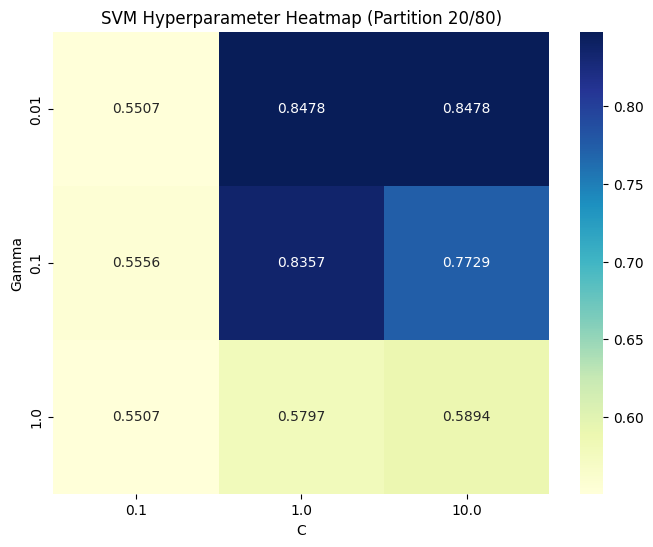

Creating heatmap for Partition: 50/50


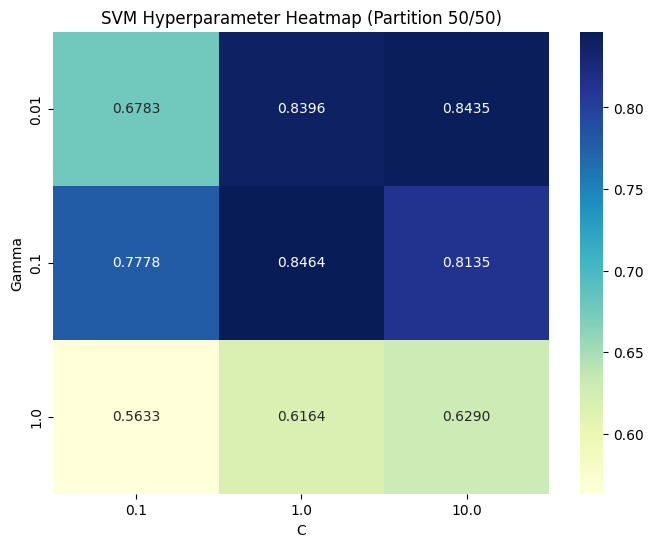

Creating heatmap for Partition: 80/20


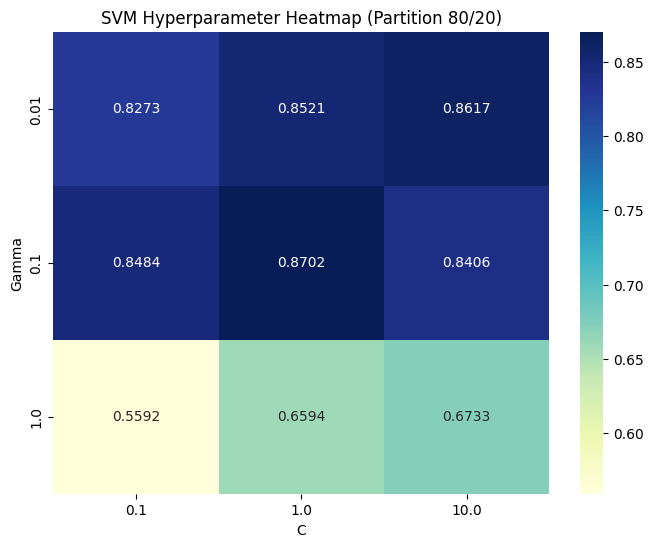

In [150]:
for partition in final_results_svm_tic["Partition"].unique():
    print(f"Creating heatmap for Partition: {partition}")
    
    partition_heatmap = final_results_svm_tic[final_results_svm_tic["Partition"] == partition]

    heatmap_pivot = partition_heatmap.pivot(index="Gamma", columns="C", values="Validation Accuracy")

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_pivot, annot=True, fmt=".4f", cmap="YlGnBu")
    plt.title(f"SVM Hyperparameter Heatmap (Partition {partition})")
    plt.xlabel("C")
    plt.ylabel("Gamma")
    plt.show()

Creating accuracy curves for Partition: 20/80


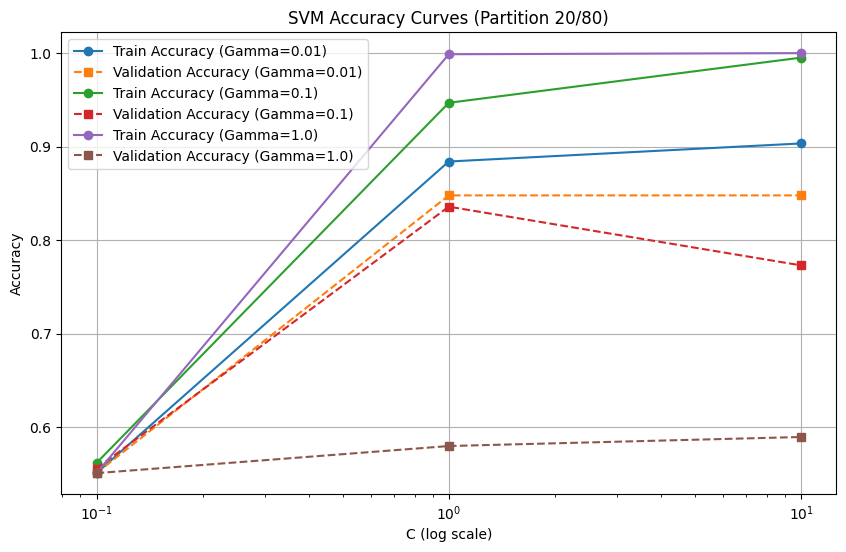

Creating accuracy curves for Partition: 50/50


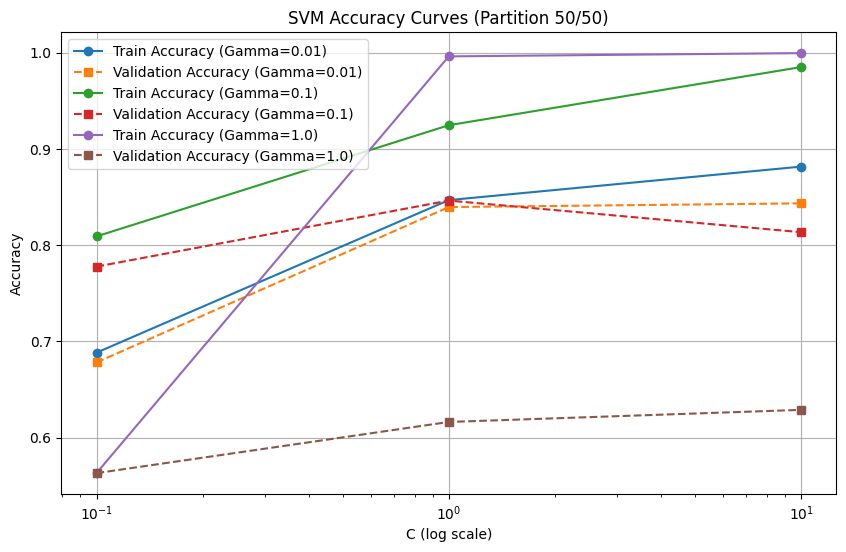

Creating accuracy curves for Partition: 80/20


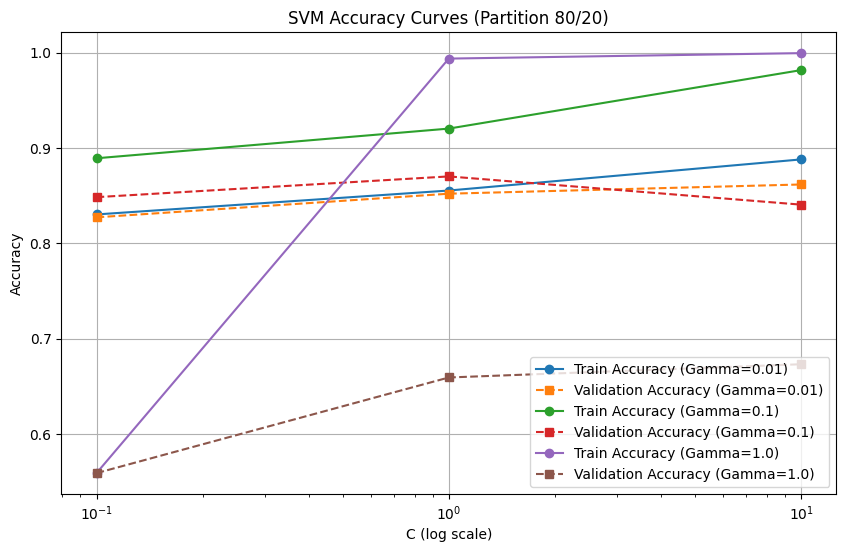

In [151]:
for partition in final_results_svm_tic["Partition"].unique():
    print(f"Creating accuracy curves for Partition: {partition}")

    partition_data = final_results_svm_tic[final_results_svm_tic["Partition"] == partition]

    plt.figure(figsize=(10, 6))
    for gamma in partition_data["Gamma"].unique():
        subset = partition_data[partition_data["Gamma"] == gamma]
        plt.plot(
            subset["C"],
            subset["Train Accuracy"],
            marker='o',
            label=f"Train Accuracy (Gamma={gamma})"
        )
        plt.plot(
            subset["C"],
            subset["Validation Accuracy"],
            marker='s',
            linestyle="--",
            label=f"Validation Accuracy (Gamma={gamma})"
        )

    plt.xscale("log")
    plt.title(f"SVM Accuracy Curves (Partition {partition})")
    plt.xlabel("C (log scale)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()


## Logistic Regression

In [152]:
num_repeats = 3

splits = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
all_results_logreg = []

for train_size, test_size in splits:
    print(f"Partition: Train {int(train_size * 100)}%, Test {int(test_size * 100)}%")
    
    partition_data = {"C": [], "Train Accuracy": [], "Validation Accuracy": [], "Test Accuracy": []}

    for repeat in range(num_repeats):
        print(f"  Repetition {repeat + 1}")
        
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size, test_size=test_size, random_state=repeat)

        logreg_params = {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        }

        logreg_grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid=logreg_params, cv=3, scoring='accuracy', return_train_score=True)
        logreg_grid.fit(X_train, y_train)

        print(f"    Best Parameters: {logreg_grid.best_params_}")

        results = pd.DataFrame(logreg_grid.cv_results_)
        for _, row in results.iterrows():
            partition_data["C"].append(row["param_C"])
            partition_data["Train Accuracy"].append(row["mean_train_score"])
            partition_data["Validation Accuracy"].append(row["mean_test_score"])
            best_model = logreg_grid.best_estimator_
            test_accuracy = best_model.score(X_test, y_test)
            partition_data["Test Accuracy"].append(test_accuracy)

    partition_df = pd.DataFrame(partition_data)
    mean_partition_df = partition_df.groupby(["C"]).mean(numeric_only=True).reset_index()
    mean_partition_df["Partition"] = f"{int(train_size * 100)}/{int(test_size * 100)}"
    all_results_logreg.append(mean_partition_df)

final_results_logreg_tic = pd.concat(all_results_logreg, ignore_index=True)

final_results_logreg_tic


Partition: Train 20%, Test 80%
  Repetition 1
    Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 2
    Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 3
    Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Partition: Train 50%, Test 50%
  Repetition 1
    Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 2
    Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 3
    Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Partition: Train 80%, Test 20%
  Repetition 1
    Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 2
    Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
  Repetition 3
    Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


,C,Train Accuracy,Validation Accuracy,Test Accuracy,Partition
0,0.01,0.836957,0.806763,0.849034,20/80
1,0.10,0.882850,0.842995,0.849034,20/80
2,1.00,0.892512,0.821256,0.849034,20/80
3,10.00,0.897343,0.821256,0.849034,20/80
4,100.00,0.902174,0.816425,0.849034,20/80
5,0.01,0.847343,0.834783,0.881159,50/50
6,0.10,0.864734,0.854106,0.881159,50/50
7,1.00,0.871981,0.860870,0.881159,50/50
8,10.00,0.873913,0.857971,0.881159,50/50
9,100.00,0.872464,0.855072,0.881159,50/50


Creating heatmap for Partition: 20/80


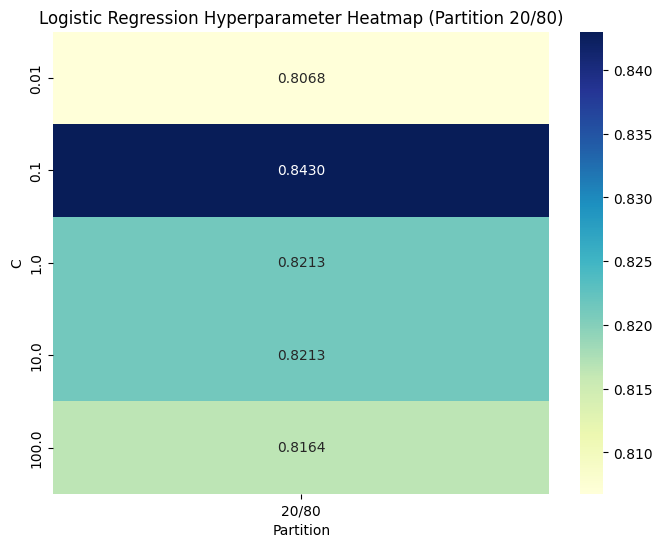

Creating heatmap for Partition: 50/50


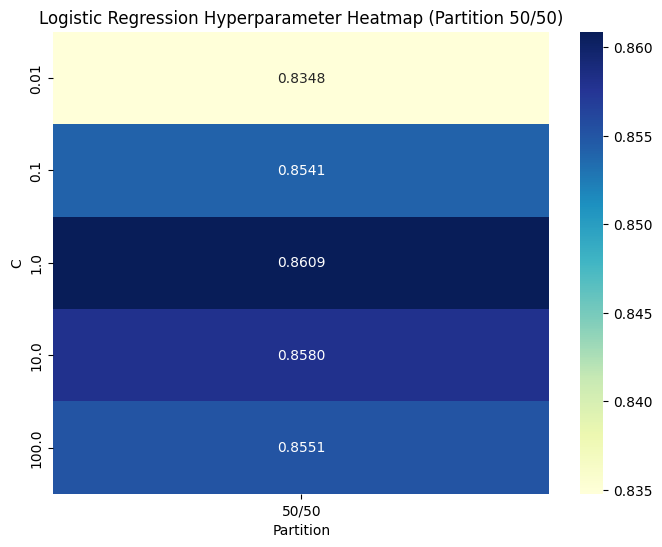

Creating heatmap for Partition: 80/20


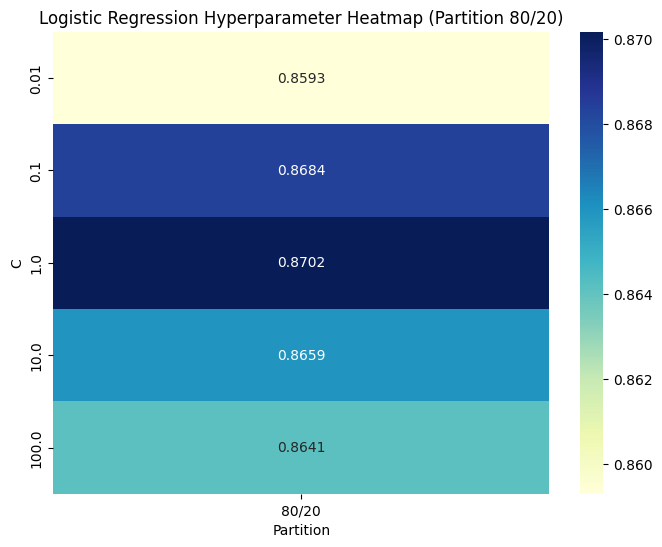

In [153]:
for partition in final_results_logreg_tic["Partition"].unique():
    print(f"Creating heatmap for Partition: {partition}")
    
    partition_heatmap = final_results_logreg_tic[final_results_logreg_tic["Partition"] == partition]

    heatmap_pivot = partition_heatmap.pivot(index="C", columns="Partition", values="Validation Accuracy")

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_pivot, annot=True, fmt=".4f", cmap="YlGnBu")
    plt.title(f"Logistic Regression Hyperparameter Heatmap (Partition {partition})")
    plt.xlabel("Partition")
    plt.ylabel("C")
    plt.show()

Creating accuracy curves for Partition: 20/80


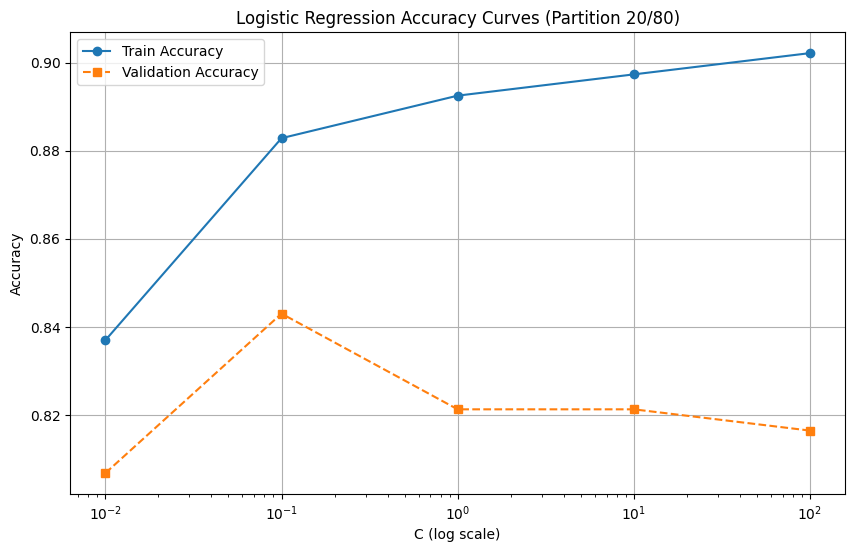

Creating accuracy curves for Partition: 50/50


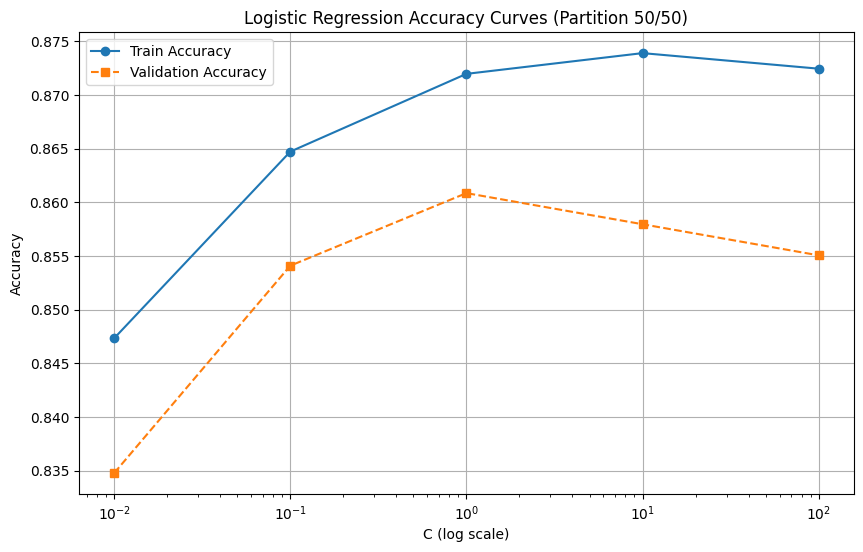

Creating accuracy curves for Partition: 80/20


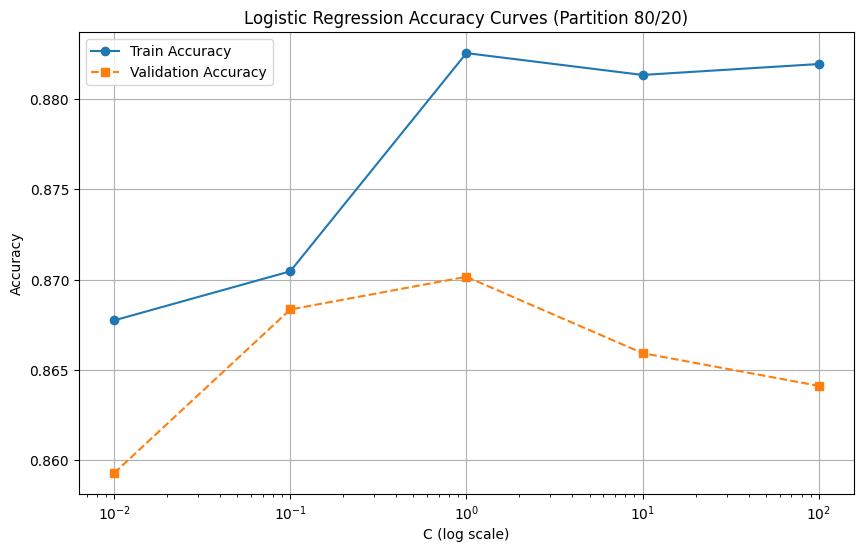

In [154]:
for partition in final_results_logreg_tic["Partition"].unique():
    print(f"Creating accuracy curves for Partition: {partition}")

    partition_data = final_results_logreg_tic[final_results_logreg_tic["Partition"] == partition]

    plt.figure(figsize=(10, 6))
    plt.plot(
        partition_data["C"],
        partition_data["Train Accuracy"],
        marker='o',
        label="Train Accuracy"
    )
    plt.plot(
        partition_data["C"],
        partition_data["Validation Accuracy"],
        marker='s',
        linestyle="--",
        label="Validation Accuracy"
    )

    plt.xscale("log")
    plt.title(f"Logistic Regression Accuracy Curves (Partition {partition})")
    plt.xlabel("C (log scale)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

## Random Forest

In [155]:
num_repeats = 3

splits = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
all_results_rf = []

for train_size, test_size in splits:
    print(f"Partition: Train {int(train_size * 100)}%, Test {int(test_size * 100)}%")
    
    partition_data = {"n_estimators": [], "max_features": [], "max_depth": [], 
                      "Train Accuracy": [], "Validation Accuracy": [], "Test Accuracy": []}

    for repeat in range(num_repeats):
        print(f"  Repetition {repeat + 1}")
        
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size, test_size=test_size, random_state=repeat)

        rf_params = {
            'n_estimators': [100, 200, 500],
            'max_features': ['sqrt', 'log2'],
            'max_depth': [None, 10, 20]
        }

        rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=3, scoring='accuracy', return_train_score=True)
        rf_grid.fit(X_train, y_train)

        print(f"    Best Parameters: {rf_grid.best_params_}")

        results = pd.DataFrame(rf_grid.cv_results_)
        for _, row in results.iterrows():
            partition_data["n_estimators"].append(row["param_n_estimators"])
            partition_data["max_features"].append(row["param_max_features"])
            partition_data["max_depth"].append(row["param_max_depth"])
            partition_data["Train Accuracy"].append(row["mean_train_score"])
            partition_data["Validation Accuracy"].append(row["mean_test_score"])
            best_model = rf_grid.best_estimator_
            test_accuracy = best_model.score(X_test, y_test)
            partition_data["Test Accuracy"].append(test_accuracy)

    partition_df = pd.DataFrame(partition_data)
    mean_partition_df = partition_df.groupby(["n_estimators", "max_features", "max_depth"]).mean(numeric_only=True).reset_index()
    mean_partition_df["Partition"] = f"{int(train_size * 100)}/{int(test_size * 100)}"
    all_results_rf.append(mean_partition_df)

final_results_rf_tic = pd.concat(all_results_rf, ignore_index=True)

final_results_rf_tic

Partition: Train 20%, Test 80%
  Repetition 1
    Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
  Repetition 2
    Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
  Repetition 3
    Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Partition: Train 50%, Test 50%
  Repetition 1
    Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
  Repetition 2
    Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}
  Repetition 3
    Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}
Partition: Train 80%, Test 20%
  Repetition 1
    Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
  Repetition 2
    Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
  Repetition 3
    Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


,n_estimators,max_features,max_depth,Train Accuracy,Validation Accuracy,Test Accuracy,Partition
0,100,log2,10.0,1.000000,0.862319,0.858696,20/80
1,100,log2,20.0,1.000000,0.862319,0.858696,20/80
2,100,sqrt,10.0,1.000000,0.862319,0.858696,20/80
3,100,sqrt,20.0,1.000000,0.862319,0.858696,20/80
4,200,log2,10.0,1.000000,0.864734,0.858696,20/80
5,200,log2,20.0,1.000000,0.867150,0.858696,20/80
6,200,sqrt,10.0,1.000000,0.864734,0.858696,20/80
7,200,sqrt,20.0,1.000000,0.867150,0.858696,20/80
8,500,log2,10.0,1.000000,0.862319,0.858696,20/80
9,500,log2,20.0,1.000000,0.864734,0.858696,20/80


Creating heatmap for Partition: 20/80


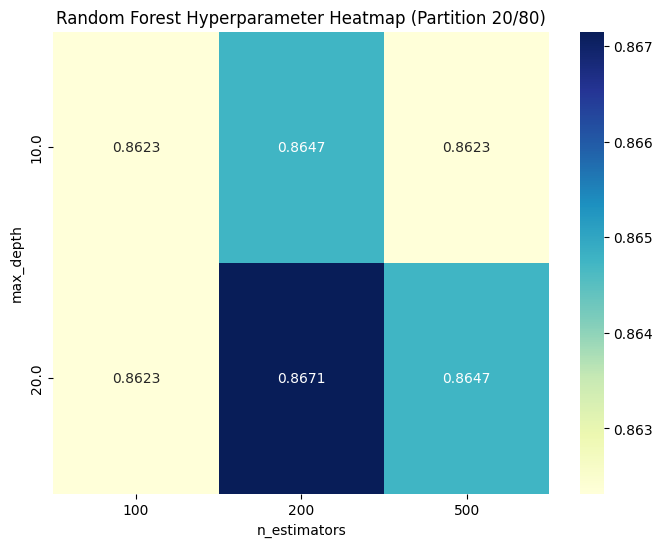

Creating heatmap for Partition: 50/50


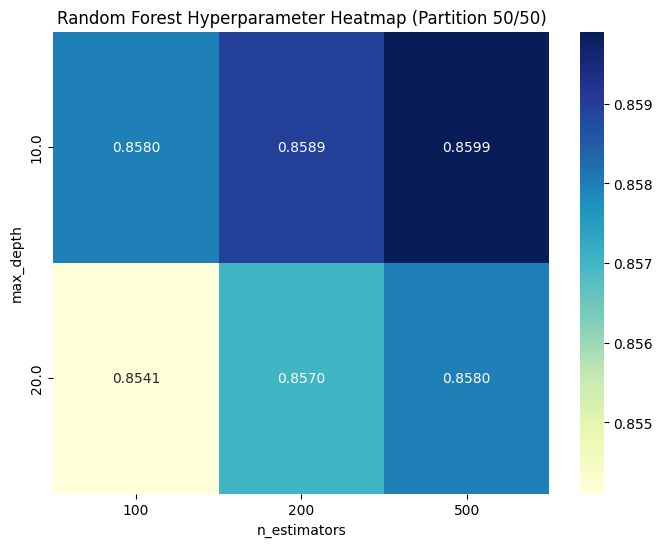

Creating heatmap for Partition: 80/20


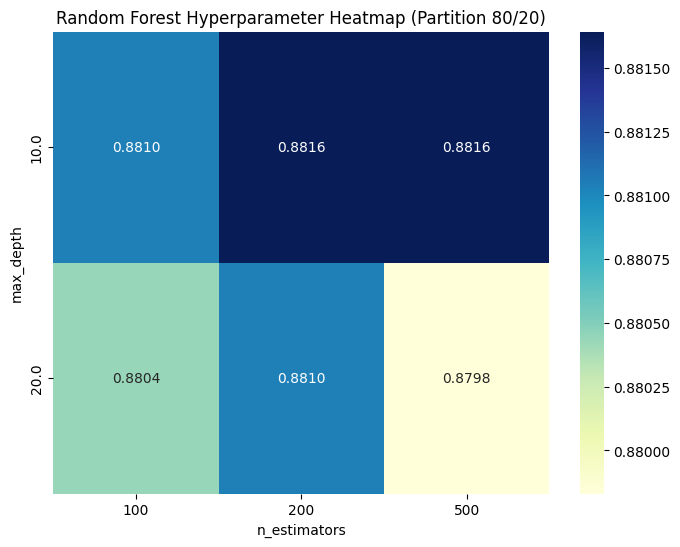

In [156]:
for partition in final_results_rf_tic["Partition"].unique():
    print(f"Creating heatmap for Partition: {partition}")
    
    partition_heatmap = final_results_rf_tic[final_results_rf_tic["Partition"] == partition]

    partition_heatmap = partition_heatmap.groupby(["n_estimators", "max_depth"]).mean(numeric_only=True).reset_index()

    heatmap_pivot = partition_heatmap.pivot(index="max_depth", columns="n_estimators", values="Validation Accuracy")

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_pivot, annot=True, fmt=".4f", cmap="YlGnBu")
    plt.title(f"Random Forest Hyperparameter Heatmap (Partition {partition})")
    plt.xlabel("n_estimators")
    plt.ylabel("max_depth")
    plt.show()

Creating accuracy curves for Partition: 20/80


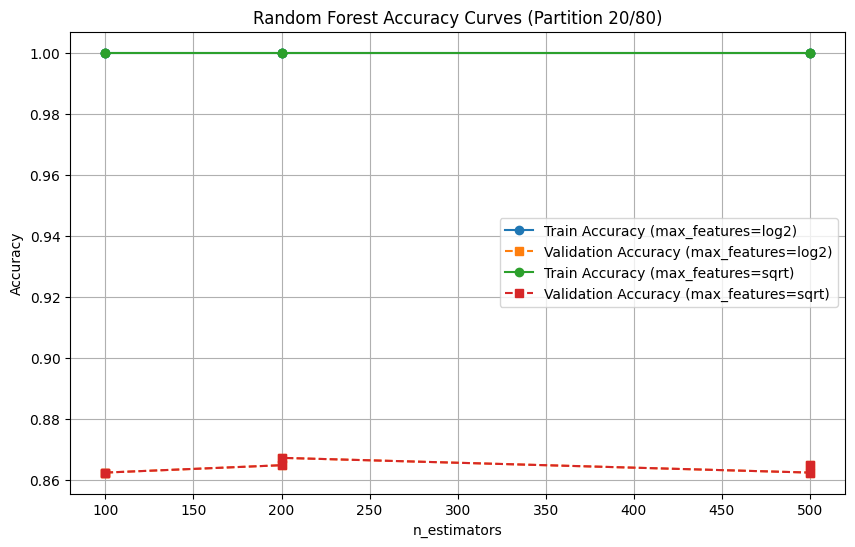

Creating accuracy curves for Partition: 50/50


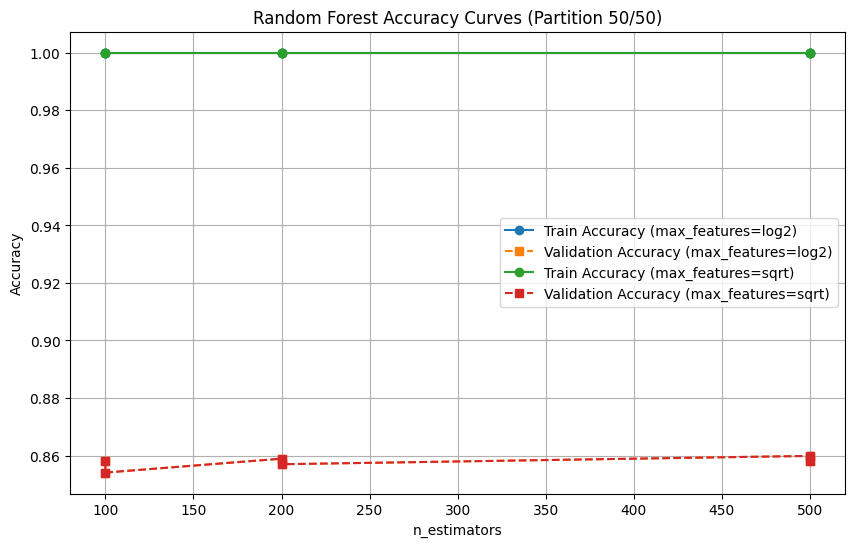

Creating accuracy curves for Partition: 80/20


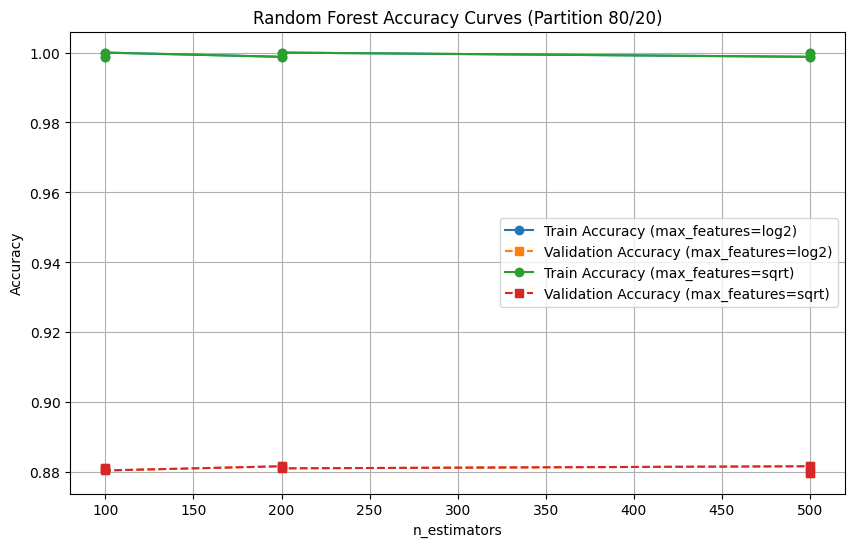

In [157]:
for partition in final_results_rf_tic["Partition"].unique():
    print(f"Creating accuracy curves for Partition: {partition}")

    partition_data = final_results_rf_tic[final_results_rf_tic["Partition"] == partition]
    plt.figure(figsize=(10, 6))

    for max_features in partition_data["max_features"].unique():
        subset = partition_data[partition_data["max_features"] == max_features]
        plt.plot(
            subset["n_estimators"],
            subset["Train Accuracy"],
            marker='o',
            label=f"Train Accuracy (max_features={max_features})"
        )
        plt.plot(
            subset["n_estimators"],
            subset["Validation Accuracy"],
            marker='s',
            linestyle="--",
            label=f"Validation Accuracy (max_features={max_features})"
        )

    plt.title(f"Random Forest Accuracy Curves (Partition {partition})")
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()


## Across Algo Comparison 

In [158]:
comparison_data_tic = []

for partition in final_results_svm_tic["Partition"].unique():
    mean_test_accuracy = final_results_svm_tic[final_results_svm_tic["Partition"] == partition]["Test Accuracy"].mean()
    comparison_data.append({"Partition": partition, "Classifier": "SVM", "Test Accuracy": mean_test_accuracy})

for partition in final_results_logreg_tic["Partition"].unique():
    mean_test_accuracy = final_results_logreg_tic[final_results_logreg_tic["Partition"] == partition]["Test Accuracy"].mean()
    comparison_data.append({"Partition": partition, "Classifier": "Logistic Regression", "Test Accuracy": mean_test_accuracy})

for partition in final_results_rf_tic["Partition"].unique():
    mean_test_accuracy = final_results_rf_tic[final_results_rf_tic["Partition"] == partition]["Test Accuracy"].mean()
    comparison_data.append({"Partition": partition, "Classifier": "Random Forest", "Test Accuracy": mean_test_accuracy})

comparison_df_tic = pd.DataFrame(comparison_data)

In [159]:
comparison_df_tic

,Partition,Classifier,Test Accuracy
0,20/80,SVM,0.911890
1,50/50,SVM,0.929741
2,80/20,SVM,0.935939
3,20/80,Logistic Regression,0.912343
4,50/50,Logistic Regression,0.916848
5,80/20,Logistic Regression,0.923272
6,20/80,Random Forest,0.934710
7,50/50,Random Forest,0.949587
8,80/20,Random Forest,0.952226
9,20/80,SVM,0.858696


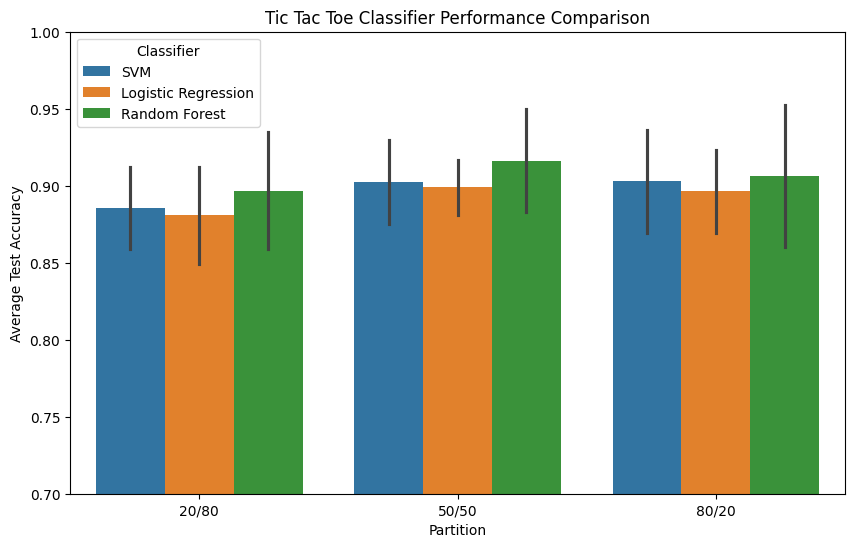

In [163]:
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df_tic, x="Partition", y="Test Accuracy", hue="Classifier")
plt.title("Tic Tac Toe Classifier Performance Comparison")
plt.ylabel("Average Test Accuracy")
plt.xlabel("Partition")
plt.ylim(0.7, 1.0)  
plt.legend(title="Classifier")
plt.show()
